# Pipeline Orders

# Pipeline 1:
___

> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Outlier IQR
    * Normalization
    * Standardization - Z-score
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection
    
# Pipeline 2: 
(see Pipeline 2 file for more information)
___
> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Standardization - Min-Max
    * Normalization
    * Outlier stdev
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection
    
# Pipeline 3: 
(see Pipeline 3 file for more information)
___
> <b> Required Order: </b> 
    * Descriptive
    * Imputation
    * Calculation
<b> Optional Order: </b>
    * Normalization
    * Outlier stdev
    * Standardization - Z-score
<b> Required Order: </b>
    * Correlation
    * Binning
    * Feature Selection

# Our Package Imports

In [ ]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as pl
import seaborn as sns
#import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn import preprocessing

#import `logistic regression` model
from sklearn.linear_model import LogisticRegression
#import mlxtend
#import pandas_profiling
#import plotly.plotly as py
#import cufflinks
#cufflinks.go_offline(connected=True)
#init_notebook_mode(connected=True)

# Other's Package Imports

In [1]:
# pandas for dataframes
import pandas as pd

# numpy for calculations and arrays
import numpy as np

# Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# Recursive Feature Elimination modules
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Import the necessary libraries for Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize

# z-score
from scipy.stats import zscore

# Interquartile range (Q3-Q1) - for outliers
from scipy.stats import iqr

# Normalization (used in histogram)
from scipy import stats
from scipy.stats import norm
## metric for calculation of kurtosis and skewness
from scipy.stats import kurtosis, skew
## Box-Cox or Yeo-johnson transformation
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import power_transform
from scipy.stats import boxcox

## Descriptive Code - Our Code

In [3]:
#taking a look at the data to see if there are any visible errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [4]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [5]:
# Describe the Data - Exploratory Data Analysis
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


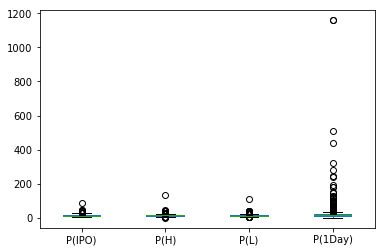

In [6]:
# Add Box Plots to further Describe the Data - for the Ps
df_p=df.iloc[:,3:7]
df_p.plot.box()

In [7]:
#Interpretation of above: All P variables are positively skewed, particularly P(1Day).

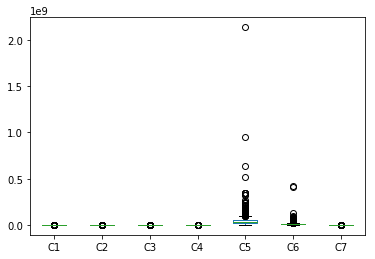

In [8]:
# Add Box Plots to further Describe the Data - for the Cs
df_p2=df.iloc[:,7:14]
df_p2.plot.box()

In [9]:
#Interpretation of above: All C variables are positively skewed, particularly C5.

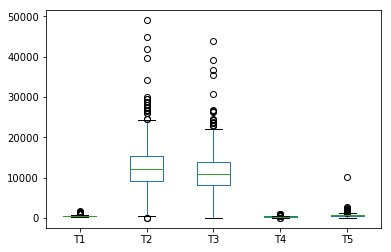

In [10]:
# Add Box Plots to further Describe the Data - for the Ts
df_p3=df.iloc[:,14:19]
df_p3.plot.box()

In [11]:
#Interpretation of above: All T variables are positively skewed, particularly T2 & T3.

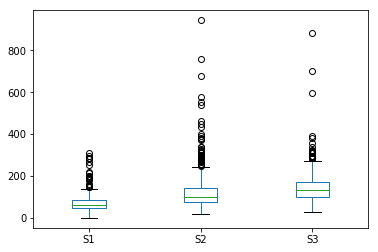

In [12]:
# Add Box Plots to further Describe the Data - for the Ss
df_p4=df.iloc[:,19:22]
df_p4.plot.box()

In [13]:
#Interpretation of above: All S variables are positively skewed.

In [14]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [15]:
#Change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [16]:
#Addressing negative ones found in the data
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,-1.0,55.0
134,643.0,-1.0


In [17]:
#Replace negative ones in the data with "Nan"
df_copy.iloc[7,18] = float('Nan')
df_copy.iloc[134,19] = float('Nan')
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,NaN,55.0
134,643.0,NaN


In [18]:
#Addressing the zeros found in columns T2 (Note: no zeros in T1)
df_copy.iloc[[125,199],[15]]

,T2
125,0.0
199,0.0


In [19]:
#Replace zeros in the data with "Nan"
df_copy.iloc[125,15] = float('Nan')
df_copy.iloc[199,15] = float('Nan')
df_copy.iloc[[125,199],[15]]

,T2
125,NaN
199,NaN


# Descriptive Code - Other's Code

In [ ]:
# If we want a data dict
dict_data = {"I1": ["Ticker", "Ticker of the IPO", "Text", "No"], 
             "I2": ["Company Name", "Name of the company offering the IPO", "Text", "No"] , 
             "I3": ["Standard Industry Classifier", "Standardized Industrial Classifier of the offering company", "Text", "No"], 
             "P(IPO)": ["Offer Price", "This is IPO finaloffering price (in dollars) stated in the 424B4 filings", "Continuous/Float", "No"], 
             "P(H)": ["Price Range Higher Bound", "This is the higher bound(in dollars) of the filing price range stated in the S-1 filings", "Continuous/Float", "No"],
             "P(L)": ["Price Range Lower Bound", "This is the lowerbound (in dollars) of the filing price  range stated in the S-1 filings", "Continuous/Float", "No"], 
             "P(1Day)": ["First Day Trading Price", "This is the first day trading (closing) price of the stock (in dollars)", "Continuous/Float", "No"], 
             "P(mid)": ["Avg of P(H) and P(L)", "Average of Filing Price Range Higher Bound & Filing Price Range Lower Bound", "Continuous/Float", "Yes"],

# Make a dataframe from the dictionary with the column name description for our 2nd column
df_dict = pd.DataFrame.from_dict(dict_data, orient='index', columns=['Short Description', "Long Description", "Data Type", "Calculated Feature"])

# Display full column length of each column (for example: 'Long Description' without truncating')
pd.set_option('display.max_colwidth', -1)

# add the index name for 1st column in pandas dataframe
df_dict = df_dict.rename_axis("Feature", axis="columns")

# show dataframe (left alligned for columns specified in subset)
df_dict.style.set_properties(**{'text-align': 'left'}, subset=['Short Description', 'Long Description', 'Data Type'])

In [ ]:
# Show number of rows and number of columns of dataframe
data.shape
print('There are:', data.shape[0], 'rows in the dataset')
print('There are:', data.shape[1], 'columns in the dataset')

In [ ]:
# Show descriptives
data.describe().round(2)

In [ ]:
# Show Missing Values
# Check for missing values in the form of NaN's (already know that missing values are represented by dashes, but defensive coding)
#data.isna().any()

# Show missing values (dashes '-') for each column
list_dashes = data.isin(['-']).sum(axis=0)
list_dashes
print(list_dashes)

In [ ]:
# Replace missing values with NaN's
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna
data.replace(to_replace='-', value=np.nan, inplace=True)

# Count NaN's
list_nan = data.isna().sum()
#print(list_nan)

# Double-check if the list of # dashes equals the list of # NaN's (Defensive Coding, not only visual inspection but also calculate)
# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.equals.html
list_dashes.equals(list_nan)

In [ ]:
# Show NaNs and Zeros
def nans_missing(df):
    # Count NaN's
    list_nan = df.isna().sum()

    # Percentage of missing values for each column (To see the amount of usable data for each column and infer the effect replacing NaN's will have by some metric in part 2)
    list_nan_pct = df.isna().mean().round(4) * 100

    # Calculate the sum of the number of times a zero appears in a feature 
    list_zeros = df.isin([0]).sum()

    # Calculate a % of the number of times a zero appears in a feature
    list_zeros_pct = df.isin([0]).mean().round(4) * 100

    # create a dataframe showing the missing and percentage that is missing
    df_combined = pd.concat([list_nan.rename('# NaNs'), list_zeros.rename('# Zeros'), list_nan_pct.rename('% NaNs'), list_zeros_pct.rename('% Zeros')], axis=1)
    
    return(df_combined)

nans_missing(df=data)

In [ ]:
# Change data types of existing columns
# Change data types according to the file: DataDictionary20190115.pdf
# Source: https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/

# Show data types of raw dataset
#data.dtypes

# make a dictionary for the data types per column name
convert_dict = {'I1': str, 
                'I2': str,
                'I3': str,
                'P(IPO)': float,
                'P(H)': float,
                'P(L)': float, 
                'P(1Day)': float,
                'C1': float,
                'C2': bool,
                'C3': float,
                'C4': float,
                'C5': float,
                'C6': float,
                'C7': float,
                'T1': float,
                'T2': float,
                'T3': float,
                'T4': float,
                'T5': float,
                'S1': float,
                'S2': float,
                'S3': float
               } 

# convert the features' datatype according to the dictionary
data = data.astype(convert_dict) 

# show the datatypes of the existing features
#data.dtypes

In [ ]:
# show number of missing for features that are needed for Y1 & Y2
print(data[['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']].isna().sum())

# show rows which have missing for P(IPO), P(H), P(L), P(1Day)
data[data['P(IPO)'].isnull() | data['P(H)'].isnull() | data['P(L)'].isnull() | data['P(1Day)'].isnull()][['I2', 'P(IPO)', 'P(H)', 'P(L)', 'P(1Day)']]

## Imputation Code - Our Code

In [ ]:
#fist make a copy of the dataframe to preserve the original data
df_impute_copy = df_copy.copy()

#Start with C2 - by determining the mode
df_impute_copy['C2'].mode()

#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.
# Include a column to determine if the row needs imputing to keep track of changes by row

#then impute median for P(IPO), P(H), P(L), P(1Day)
df_impute_copy['P(IPO)'].fillna(df_impute_copy['P(IPO)'].median(), inplace=True)
df_impute_copy['P(H)'].fillna(df_impute_copy['P(H)'].median(), inplace=True)
df_impute_copy['P(L)'].fillna(df_impute_copy['P(L)'].median(), inplace=True)
df_impute_copy['P(1Day)'].fillna(df_impute_copy['P(1Day)'].median(), inplace=True)

#now impute median for C1, C3, C4, C5, C6, C7
df_impute_copy['C1'].fillna(df_impute_copy['C1'].median(), inplace=True)
df_impute_copy['C3'].fillna(df_impute_copy['C3'].median(), inplace=True)
df_impute_copy['C4'].fillna(df_impute_copy['C4'].median(), inplace=True)
df_impute_copy['C5'].fillna(df_impute_copy['C5'].median(), inplace=True)
df_impute_copy['C6'].fillna(df_impute_copy['C6'].median(), inplace=True)
df_impute_copy['C7'].fillna(df_impute_copy['C7'].median(), inplace=True)

#now impute mode for C2...using the mode determined above (i.e., the series above with one number in it)
#df_impute_copy['C2'].fillna(1.0, inplace=True)
df_impute_copy['C2'].fillna(df_impute_copy['C2'].mode()[0],inplace=True)

#now impute median for T1, T2, T3, T4, T5
df_impute_copy['T1'].fillna(df_impute_copy['T1'].median(), inplace=True)
df_impute_copy['T2'].fillna(df_impute_copy['T2'].median(), inplace=True)
df_impute_copy['T3'].fillna(df_impute_copy['T3'].median(), inplace=True)
df_impute_copy['T4'].fillna(df_impute_copy['T4'].median(), inplace=True)
df_impute_copy['T5'].fillna(df_impute_copy['T5'].median(), inplace=True)

#now impute median for S1, S2, S3
df_impute_copy['S1'].fillna(df_impute_copy['S1'].median(), inplace=True)
df_impute_copy['S2'].fillna(df_impute_copy['S2'].median(), inplace=True)
df_impute_copy['S3'].fillna(df_impute_copy['S3'].median(), inplace=True)

#check work
df_impute_copy.head(15)

#Double-checking via "describe" - all imputation done except for C2
df_impute_copy.describe()

# Other Group's Imputation Code - Imputation for each feature individually**

In [1]:
##Very long so I only put a few features in here, the rest are in Pipeline 1, 2, 3 notebooks
# P(H) & P(L) #
# Requirement: Price Range Higher Bound should always be larger or equal to Price Range Lower Bound
# Definition P(H): Price Range Higher Bound - This is the higher bound (in dollars) of the filing price range stated in the S-1 filings
# Definition P(L): Price Range Lower Bound - This is the lower bound (in dollars) of the filing price range stated in the S-1 filings

# test if P(H) is smaller than P(L) for rows in our dataset
print(data[data['P(H)'] < data['P(L)']][['I1', 'I2', 'P(H)', 'P(L)']])

# -------------------------------------------------------------------------------------------------
# Strategy 1: IF P(H) < P(L) => Replace the Price Range Higher Bound by the Price Range Lower Bound
# -------------------------------------------------------------------------------------------------
# replace the P(H) by the P(L)
data['P(H)'] = np.where((data['P(H)'] < data['P(L)']), data['P(L)'], data['P(H)'])

# print conclusion
print('Succesfully replaced 2 rows, whereby the Price Higher Bound is smaller then the Price Lower Bound')

# test if P(H) was correctly replaced for 2 rows by the P(L)
data.loc[[332, 416], ['I1', 'I2', 'P(H)', 'P(L)']]

# -------------------------------------------------------------------------------------------------
# Strategy 2: IF P(H) < P(L) => Replace the Price Range Higher Bound by the Price Range Lower Bound multiplied by a % of which this is on average higher in our dataset relative to the lower bound
# -------------------------------------------------------------------------------------------------
# OPTIONAL STRATEGY...

NameError: name 'data' is not defined

In [272]:
# P(1Day) #
# Check if there are any zero's in P(1Day)

# calculate % that is zero for P(1Day)
print(str(data[data['P(1Day)'] == 0].shape[0]/data['P(1Day)'].shape[0]*100)+str('%'))
#(4/660)*100

# show the rows which have zero for the feature P(1Day)
data[data['P(1Day)'] == 0]

# comment: unless we could find the actual closing price for each stock in the IPO we cannot impute
# tried finding ticker: 'ACW' on Yahoo Finance without results
# since it only affects 0.61% of our dataset it will not affect our final results by much

0.6060606060606061%


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T4_more_than_151_longsntncs_binary,T4_more_than_152_longsntncs_binary,T4_more_than_153_longsntncs_binary,T4_more_than_154_longsntncs_binary,T4_more_than_155_longsntncs_binary,S1’_minus_S2’,S1_minus_S2,S1_minus_S2_div_t3,sum_s_features,S1_div_S2
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.0,-0.326513,True,1.408733,...,1,1,1,1,1,0.726944,1.703734,0.128761,12.260083,1.494327
266,GSAT,"Globalstar, Inc.",4899,17.0,18.0,16.0,0.0,-0.295286,True,0.392156,...,1,1,1,1,1,0.426284,1.267749,0.086166,12.911453,1.321083
279,HERO,"HERCULES OFFSHORE, INC.",1381,20.0,20.0,18.0,0.0,-0.248445,True,0.262455,...,1,1,1,1,1,0.609721,0.954313,0.068604,11.619084,1.270877
364,MATH,SAJAN INC,3674,6.0,8.0,6.0,0.0,-0.654402,False,-0.559877,...,0,0,0,0,0,0.471636,0.443866,0.036131,10.172714,1.135912


## __FUNCTIONS FOR IMPUTING__ ##

In [33]:
# NOTES #
# Previous testing showed us the following features need imputation or are already imputed above:
# ----------------------------
# 1. STILL NEED IMPUTATION
# ----------------------------
    # C3 #
    # - Missing C3 can be replaced by the function in this chapter by the mean/median/zero of the EPS
    # - 24 NaNs and 5 Zero's in dataset

    # C7 #
    # - Strategy 1: replace C7 NaN's with zero, assumption: because no prior yearly sales have been made yet
    # - Strategy 2: replace C7 NaN's with average/median
    # - Strategy 3: replace C7 values that are missing, based on other columns -> percentage of (offer price*outstanding shares)*5% (assuming 5% is the profit of the sales)
# ----------------------------
# 2. ALREADY IMPUTED VARIABLES
# ----------------------------
    # P variables for which we could not calculate Y1 & Y2 
    # 22 rows removed
    
    # T2 #
    # - Strategy 1: replace Zero's with formula: (the average ratio of words per sentence in dataset multiply by amount of sentences)
    # 2 rows affected

    # T3 #
    # - Strategy 1: replace zero's with formula: (the average ratio of real words to total words * the number of words)
    
    # T4 #
    # - Strategy 1: replace zero's with formula: (the average ratio of long sentences to total sentences * the number of sentences)
    
    # T5 #
    # - Strategy 1: replace negative value with formula: (the average ratio of long words to total words * the number of words)
    
    # S1 #
    # - Strategy 1: replace negative value with formula: (the average ratio of positive words to total words * the number of words)

### 1. Replace Nan's Continuous/Float Fields by zero ###

In [34]:
def replace_nan_by_zero(df, column_list): 
    # replace nans by zeros
    df[column_list] = df[column_list].replace(np.NaN, 0)

# Replace C7 NaNs by zero
replace_nan_by_zero(df=data, column_list=['C7'])

# test if column C7 has no more missing
data['C7'].isna().sum() == 0

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self[k1] = value[k2]


True

### 2. Replace NaN's Continuous/Float Fields by their MEAN  ###

In [35]:
# ///////////////////////////////////////////
# STRATEGY 1 - REPLACE ZEROS AND NaNs BY MEAN
# ///////////////////////////////////////////

# create a function to replace zero's within a list of column-names with nan's first, then calculate the mean columnwise and lastly replace the nan's with mean
def replace_zero_by_mean(df, column_list): 
    # replace zero's by nans - so that it wont affect the calculation of the mean (nans are excluded from calculation of the mean)
    #df[column_list] = df[column_list].replace(0, np.NaN)
    
    # replace the NaN's in every column in the column list by its mean
    df[column_list] = df[column_list].fillna(df[column_list].mean())

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective mean
replace_zero_by_mean(df=data, column_list=['C3']) 

### 3. Replace NaN's Continuous/Float Fields by their MEDIAN  ###

In [36]:
# ///////////////////////////////////////////
# STRATEGY 2 - REPLACE ZEROS AND NaNs BY MEDIAN
# ///////////////////////////////////////////

# create a function to replace zero's within a list of column-names with nan's first, then calculate the median columnwise and lastly replace the nan's with median
def replace_zero_by_median(df, column_list): 
    # replace zero's by nans - so that it wont affect the calculation of the median (nans are excluded from calculation of the median)
    #df[column_list] = df[column_list].replace(0, np.NaN)
    
    # replace the NaN's in every column in the column list by its median
    df[column_list] = df[column_list].fillna(df[column_list].median())

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective median
#replace_zero_by_median(df=data, column_list=['C3']) 

### 4. Replace NaN's Boolean Fields by their MODE  ###

In [37]:
# this function is not needed for our dataset
# unless we don't replace C5 & C6 columns with median/mean before we compute C5'
def replace_nans_by_mode(df, column_list):
    df[column_list] = df[column_list].fillna(df[column_list].mode())

## <b> 2.3 Imputation </b> - Categorical Features ##

* I3 - SIC Code 
> Replace missing SIC Codes with additional data sources

In [38]:
# I3 - Definition: Standardized Industrial Classifier of the offering company
# Source: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

# Mimimum Requirements feature: 
# Req1 - 4-digit code
# Req2 - Every digit should be a positive number in the range of [0-9]
# Req3 - Check missing (NaN's) => need to be replaced by finding the SIC code online, else make an "educated guess" of the SIC code based on indudstry type/core-business of company

# Optional requirement for Normalization
# Bin each SIC code based on the industry category (ranges are described in 'Source' article)

# -------------------------------------------------------------
# Req1 - check if the feature has a 4-digit code for all values
# -------------------------------------------------------------
# filter dataframe based on condition (the length of the string in each row of I3 is either bigger or smaller than 4) and return only results if condition holds true
print('There are', data[data['I3'].apply(lambda x: len(x)!=4)].shape[0], 'SIC codes in the dataset that should be adjusted! [Either bigger OR smaller than 4 characters]')

# show only two columns with company name and SIC code
#data[data['I3'].apply(lambda x: len(x)!=4)][['I2', 'I3']]

# show filtered dataframe (when condition is True)
data[data['I3'].apply(lambda x: len(x)!=4)]

There are 8 SIC codes in the dataset that should be adjusted! [Either bigger OR smaller than 4 characters]


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
118,CERE,"Ceres, Inc.",100,13.0,17.0,16.0,118.400002,275.0,True,-12.40,...,5000000.0,6.616,552.0,16370.0,14921.0,407.0,829.0,106.0,105.0,193.0
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819",18.0,18.0,16.0,24.299999,90.0,True,0.47,...,27500000.0,289.041,500.0,15288.0,14243.0,360.0,912.0,69.0,122.0,165.0
181,DOLE,DOLE FOOD CO INC,100,12.5,15.0,13.0,12.280000,70.0,True,121.00,...,35715000.0,7619.952,878.0,22922.0,20861.0,548.0,1065.0,250.0,290.0,289.0
187,DTSI,"DTS, INC.","3651, 6794, 7819",17.0,16.0,14.0,24.920000,76.0,False,0.99,...,3840000.0,41.056,339.0,8274.0,7487.0,204.0,421.0,49.0,95.0,70.0
221,EXLS,"ExlService Holdings, Inc.",541990,13.5,12.0,10.0,18.840000,683.0,True,0.26,...,5000000.0,73.954,534.0,13599.0,12071.0,312.0,724.0,69.0,112.0,188.0
246,G,Genpact LTD,541990,14.0,18.0,16.0,16.750000,83.0,True,0.19,...,35294118.0,617.977,641.0,15238.0,13795.0,360.0,727.0,92.0,113.0,184.0
499,RLD,RealD Inc.,"3663, 3861, 6794",16.0,15.0,13.0,19.510000,98.0,True,-0.33,...,12500000.0,39.675,629.0,15904.0,14741.0,364.0,899.0,104.0,139.0,227.0
620,UPG,UNIVERSAL POWER GROUP,"7389, 5063",7.0,9.0,7.0,7.350000,101.0,False,0.38,...,3000000.0,81.275,304.0,6904.0,6234.0,147.0,287.0,29.0,61.0,66.0


In [39]:
# -------------------------------------------------------------------------------------------------------------------------- -----------------
# Req2 SIC CODES- Check if every character in SIC-code is a positive number in the range of [0-9], if not add to a new list and print the list
# Defensive Coding - note that you can manually check in Excel file and see in filter if there are negative values etc.
# -------------------------------------------------------------------------------------------------------------------------- -----------------

# first create an empty list to fill with the loop
wrong_sic_code_lst = []
correct_sic_number_lst = []

# for every element (row) in the dataset 'data' in column 'I3' do something
for string in data['I3']:
    # try to convert the string into a float, if not go to except
    try:
        # convert element into float
        float(string)
        # for every element iterate through each character in the element (every number) and check condition
        for character in string:
            # condition: if each number in the SIC-code element is between 0-9 do nothing
            if (float(character) >= 0) & (float(character) <=9):
                correct_sic_number_lst.append(character)
            else:
                wrong_sic_code_lst.append(string)
    except:
        # append those values of SIC-codes to the list when the SIC-code cannot be converted into a float/integers
        wrong_sic_code_lst.append(string)

# count elements in list
print('There are', len(wrong_sic_code_lst), 'SIC Codes which not exclusively contain positive numbers between 0 and 9, namely:')

# show list with SIC codes which are not positive numbers (AND THUS NOT NUMBERS)
wrong_sic_code_lst

# test if list with correct sic numbers is between 0 and 9
# correct_sic_number_lst

# result shows that nan's and a list of multiple SIC codes are not considered numbers due to the comma in those lists within values
# conclusion: these are the same number of values as can be seen from the previous list which are wrong MINUS the following values [100, 100, 541990,541990] 

There are 4 SIC Codes which not exclusively contain positive numbers between 0 and 9, namely:


['6794, 3861, 3663, 7819',
 '3651, 6794, 7819',
 '3663, 3861, 6794',
 '7389, 5063']

In [40]:
# ------------------------------------------------------------------------------
# Req3 SIC CODES - Check missing (NaN's)
# -----------------------------------------------------------------------------
# Filter the dataframe based on condition, namely which have 'nan' for column I3
print('There are', data[data['I3']=='nan']['I3'].count(), 'nans in column I3')
data[data['I3']=='nan']

There are 0 nans in column I3


,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3


In [41]:
# Replace invalid & nan values in column 'I3' and replace with valid SIC Codes

# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# STEP 1: Replace 'nan' values in column 'I3' for each company with their respective SIC Codes
# //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# ------------------------------------------------------------------------------------------
# 1. AdCare Health Systems , Inc.
# ------------------------------------------------------------------------------------------
# NAICS Code 62331, 623110 => source: https://www.zoominfo.com/c/Adcare-health-systems-inc/1281163
# SIC Code 8051 => Convert NAICS Code to SIC Code => source: https://www.naics.com/naics-to-sic-crosswalk-search-results   

# Get the Ticker Symbol
# data.loc[data['I2'] == 'AdCare Health Systems , Inc.']['I1']

# Convert nan for AdCare Health Systems , Inc. to SIC Code: 8051
# Syntax: Dataframe.loc[row_index, column_index]
data.loc[data['I1'] == 'ADKU', 'I3'] = '8051'

# ------------------------------------------------------------------------------------------
# 2. BLOUNT INTERNATIONAL INC
# ------------------------------------------------------------------------------------------
# SIC CODE 5122 => source: https://siccode.com/business/blount-international-inc-1

# Get the Ticker Symbol
# data.loc[data['I2'] == 'BLOUNT INTERNATIONAL INC']['I1']

# Convert nan for BLOUNT INTERNATIONAL INC to SIC Code: 5122
data.loc[data['I1'] == 'BLT', 'I3'] = '5122'

# ------------------------------------------------------------------------------------------
# 3. GLOBAL SIGNAL INC
# ------------------------------------------------------------------------------------------
# SIC CODE 6798 => source: https://www.manta.com/d/mby471v/global-signal-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'GLOBAL SIGNAL INC']['I1']

# Convert nan for GLOBAL SIGNAL INC to SIC Code: 6798
data.loc[data['I1'] == 'GSL', 'I3'] = '6798'

# ------------------------------------------------------------------------------------------
# 4. KKR Financial Holdings LLC
# ------------------------------------------------------------------------------------------
# SIC CODE 6282 => source: https://siccode.com/business/kkr-financial-advisors-llc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'KKR Financial Holdings LLC']['I1']

# Convert nan for KKR Financial Holdings LLC to SIC Code: 6282
data.loc[data['I1'] == 'KFI', 'I3'] = '6282'

# ------------------------------------------------------------------------------------------
# 5. National American University Holdings, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 8221 => source: https://www.manta.com/d/mmy9db7/national-american-university-holdings-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'National American University Holdings, Inc.']['I1']

# Convert nan for National American University Holdings, Inc. to SIC Code: 8221
data.loc[data['I1'] == 'NAUH', 'I3'] = '8221'

# ------------------------------------------------------------------------------------------
# 6. CHINA CGAME, INC.
# ------------------------------------------------------------------------------------------
# SIC CODE 8711 => source: https://sec.report/Ticker/CCGM

# Get the Ticker Symbol
# data.loc[data['I2'] == 'CHINA CGAME, INC.']['I1']

# Convert nan for CHINA CGAME, INC. to SIC Code: 8711
data.loc[data['I1'] == 'RCH', 'I3'] = '8711'

# ------------------------------------------------------------------------------------------
# 7. Access to Money, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 7699 => source: https://www.manta.com/d/mmfnjm2/access-to-money-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Access to Money, Inc. ']['I1']

# Convert nan for Access to Money, Inc. to SIC Code: 7699
data.loc[data['I1'] == 'TRMM', 'I3'] = '7699'

# ------------------------------------------------------------------------------------------
# 8. TRAVELZOO INC
# ------------------------------------------------------------------------------------------
# SIC CODE 4724 => source: https://siccode.com/business/travelzoo-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'TRAVELZOO INC']['I1']

# Convert nan for TRAVELZOO INC to SIC Code: 4724
data.loc[data['I1'] == 'TZOO', 'I3'] = '4724'

# ------------------------------------------------------------------------------------------
# TEST CODE
# ------------------------------------------------------------------------------------------
# test if code replaced missing nan's in column 'I3' correctly (should be an empty dataframe if correctly replaced)
# data[data['I3']=='nan']

# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
# STEP 2: Replace remaining values larger or smaller than 4 digits in column 'I3' for each company with their respective SIC Codes
# ///////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# show dataframe with remaining 'missing' sic-codes which do not meet set requirements (besides 'nan' values)
# data[data['I3'].apply(lambda x: len(x)!=4)]

# ------------------------------------------------------------------------------------------
# 9. Ceres, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 5261 => source: https://siccode.com/business/ceres-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Ceres, Inc.']['I1']

# Convert '100' for Ceres, Inc. to SIC Code: 5261
data.loc[data['I1'] == 'CERE', 'I3'] = '5261'

# ------------------------------------------------------------------------------------------
# 10. Dolby Laboratories, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 5731 => source: https://siccode.com/business/dolby-laboratories-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Dolby Laboratories, Inc. ']['I1']

# Convert [6794, 3861, 3663, 7819] for Dolby Laboratories, Inc. to SIC Code: 5731 
data.loc[data['I1'] == 'DLB', 'I3'] = '5731'

# ------------------------------------------------------------------------------------------
# 11. DOLE FOOD CO INC
# ------------------------------------------------------------------------------------------
# SIC CODE 0191 => source: https://siccode.com/business/dole-food-co-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'DOLE FOOD CO INC']['I1']

# Convert '100' for DOLE FOOD CO INC to SIC Code: 0191 
data.loc[data['I1'] == 'DOLE', 'I3'] = '0191'

# ------------------------------------------------------------------------------------------
# 12. DTS, INC.
# ------------------------------------------------------------------------------------------
# SIC CODE 3651 => source: https://siccode.com/business/dts-inc-1

# Get the Ticker Symbol
# data.loc[data['I2'] == 'DTS, INC.']['I1']

# Convert '3651, 6794, 7819' for DTS, INC. to SIC Code: 3651 
data.loc[data['I1'] == 'DTSI', 'I3'] = '3651'

# ------------------------------------------------------------------------------------------
# 13. ExlService Holdings, Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 7389 => source: https://siccode.com/business/exlservice-holdings-inc

# Get the Ticker Symbol
# data.loc[data['I2'] == 'ExlService Holdings, Inc.']['I1']

# Convert '541990' for ExlService Holdings, Inc. to SIC Code: 7389 
data.loc[data['I1'] == 'EXLS', 'I3'] = '7389'

# ------------------------------------------------------------------------------------------
# 14. Genpact LTD
# ------------------------------------------------------------------------------------------
# SIC CODE 7389 => source: https://siccode.com/business/genpact

# Get the Ticker Symbol
# data.loc[data['I2'] == 'Genpact LTD ']['I1']

# Convert '541990' for Genpact LTD to SIC Code: 7389
data.loc[data['I1'] == 'G', 'I3'] = '7389'

# ------------------------------------------------------------------------------------------
# 15. RealD Inc.
# ------------------------------------------------------------------------------------------
# SIC CODE 3663 => source: https://sec.report/Ticker/RLD

# Get the Ticker Symbol
# data.loc[data['I2'] == 'RealD Inc.']['I1']

# Convert '3663, 3861, 6794' for RealD Inc. to SIC Code: 3663 
data.loc[data['I1'] == 'RLD', 'I3'] = '3663'

# ------------------------------------------------------------------------------------------
# 16. UNIVERSAL POWER GROUP
# ------------------------------------------------------------------------------------------
# SIC CODE 5065 => source: https://siccode.com/business/universal-power-group-inc

# Get the Ticker Symbol
#data.loc[data['I2'] == 'UNIVERSAL POWER GROUP ']['I1']

# Convert '7389, 5063' for UNIVERSAL POWER GROUP to SIC Code: 5065
data.loc[data['I1'] == 'UPG', 'I3'] = '5065'

# ------------------------------------------------------------------------------------------
# TEST if all are SIC Codes are succesfully replaced (should have empty dataframe based on condition)
# ------------------------------------------------------------------------------------------
data[data['I3'].apply(lambda x: len(x)!=4)]

# If number of rows in dataframe equal zero, means SIC Codes succesfully replaced 'nan' & non-4 digit numbers , equal to true
data[data['I3'].apply(lambda x: len(x)!=4)].shape[0] == 0

/opt/tljh/user/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.obj[item] = s


True

# Calculation Code - Our Code

In [27]:
#Add calculated fields

#Create P(mid) variable
df_impute_copy['P(mid)'] = (df_impute_copy['P(H)'] + df_impute_copy['P(L)']) / 2

#Create variable true_value for C6P
true_value = ((df_impute_copy['P(IPO)'] - df_impute_copy['P(mid)']) / df_impute_copy['P(mid)'])*100

# Add T1'=T4/T1 & S1'=S1/T2 Calcualte all the ratios for the Ts & S Colums
df_impute_copy['Long_to_Total_Sentences'] = df_impute_copy['T4'] / df_impute_copy['T1']
df_impute_copy['Pos_to_Total_Words'] = df_impute_copy['S1'] / df_impute_copy['T2']
df_impute_copy['Neg_to_Total_Words'] = df_impute_copy['S2'] / df_impute_copy['T2']
df_impute_copy['Uncertain_to_Total_Words'] = df_impute_copy['S3'] / df_impute_copy['T2']
df_impute_copy['Pos_Neg_Words'] = df_impute_copy['S1'] / df_impute_copy['S2']
df_impute_copy['Uncertain_to_Pos_Words'] = df_impute_copy['S3'] / df_impute_copy['S1']
df_impute_copy['Uncertain_to_Neg_Words'] = df_impute_copy['S3'] / df_impute_copy['S2']
df_impute_copy['Real_to_Total_Words'] = df_impute_copy['T3'] / df_impute_copy['T2']
df_impute_copy['Long_to_Total_Words'] = df_impute_copy['T5'] / df_impute_copy['T2']

#Create new columns for "prime" variables
#Add them to df_impute_copy
df_impute_copy['C3P'] = np.where(df_impute_copy['C3'] > 0, '1', '0')
df_impute_copy['C5P'] = df_impute_copy['C5'] / df_impute_copy['C6']
df_impute_copy['C6P'] = np.where(df_impute_copy['P(IPO)'] > df_impute_copy['P(mid)'], true_value, '0')
df_impute_copy['Y1'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(mid)'], '1', '0')
df_impute_copy['Y2'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(1Day)'], '1', '0')



#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_impute_copy.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.529915,2.241935,1.188034,0.908876,0.054250,1,3.864345,11.11111111111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.293388,3.338028,0.979339,0.898724,0.051395,0,12.028832,0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,1.848485,0.983607,1.818182,0.909350,0.061764,0,3.369134,0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,1.355932,1.375000,1.864407,0.917060,0.061630,0,3.299697,0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.449664,2.492537,1.120805,0.888469,0.048550,1,3.726269,5.0,0,1


In [28]:
df_impute_copy[['C6P','I3','C3P']] = df_impute_copy[['C6P','I3','C3P']].astype('float')
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

## Subsetting the data into separate dataframes: continuous, non-continuous, evaluation list

In [29]:
# creating a list of the continuous columns that may need to be normalized.

categorical_list = df_impute_copy.columns.tolist() # This includes C2, I1, I2, and I3...
del categorical_list[9:-2]
del categorical_list[3:8]
categorical_list = ['C2','I1', 'I2', 'I3', 'Y1', 'Y2']
print(categorical_list)

col_list = df_impute_copy.columns.tolist() # This excludes C2, I1, I2, and I3...NEED TO EXCLUDE THE CATEGORICALS FROM HERE
del col_list[0:4]
del col_list[4]
print(col_list)

# Create a list of columns to use in the evaluation code baseline
eval_list = df_impute_copy.columns.tolist()
del eval_list[0:7]
del eval_list[1]
del eval_list[6:14]
print(eval_list)


['C2', 'I1', 'I2', 'I3', 'Y1', 'Y2']
['P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']
['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'P(mid)', 'Long_to_Total_Sentences', 'Pos_to_Total_Words', 'Neg_to_Total_Words', 'Uncertain_to_Total_Words', 'Pos_Neg_Words', 'Uncertain_to_Pos_Words', 'Uncertain_to_Neg_Words', 'Real_to_Total_Words', 'Long_to_Total_Words', 'C3P', 'C5P', 'C6P', 'Y1', 'Y2']


In [30]:
df_impute_copy.dtypes

I1                            object
I2                            object
I3                           float64
P(IPO)                       float64
P(H)                         float64
P(L)                         float64
P(1Day)                      float64
C1                           float64
C2                          category
C3                           float64
C4                           float64
C5                           float64
C6                           float64
C7                           float64
T1                           float64
T2                           float64
T3                           float64
T4                           float64
T5                           float64
S1                           float64
S2                           float64
S3                           float64
P(mid)                       float64
Long_to_Total_Sentences      float64
Pos_to_Total_Words           float64
Neg_to_Total_Words           float64
Uncertain_to_Total_Words     float64
P

# Calculation Code - Other's Code

In [42]:
def add_new_features(df=data):

    # Create P(mid) (average of Filing Price Range Higher Bound & Filing Price Range Lower Bound)
    # Formula: P(mid) = (P(H)+P(L))/2
    df['P(mid)'] = (df['P(H)']+df['P(L)'])/2

    # Create Y1 (Pre-IPO Price Revision)
    # Formula: Set to 1 if P(IPO) < P(mid), where P(mid) = (P(H)+P(L))/2, otherwise 0
    df['Y1'] = np.where((df['P(IPO)'] < df['P(mid)']), 1, 0)

    # Create Y2 (Post-IPO Initial Return)
    # Formula: Set to 1 if P(IPO) < P(1Day), otherwise 0
    df['Y2'] = np.where((df['P(IPO)'] < df['P(1Day)']), 1, 0)

    # Create C3’ (Positive EPS Dummy)
    # Formula: Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
    df['C3’'] = np.where((df['C3'] > 0), 1, 0)

    # Create C5’ (Share Overhang)
    # Formula: C5’= C5/C6
    df['C5’'] = df['C5']/df['C6']

    # Create C6’ (Up Revision)
    # Definition: The  percentage upward  revision  from  the  mid-point  of the  filing  range  if  the offer  price  is greater  than the  mid-point, otherwise zero
    # Formula: Set to (P(IPO) –P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0
    df['C6’'] = np.where((df['P(IPO)'] > df['P(mid)']), ((df['P(IPO)']-df['P(mid)'])/df['P(mid)']), 0)

    #######################################
    # RATIOS OF FEATURES (Words/Sentences)
    #######################################
    # T1’
    # Formula: T1’= T4/T1
    # (Number of Long Sentences / Number of Sentences)
    #df['T1’'] = df['T4']/df['T1']
    # removed this because it is the same as t4’

    # T2’
    # Formula: T2’ = T2/T1
    # (Number of Words/Number of Sentences)
    df['T2’'] = df['T2']/df['T1']

    # T3’
    # Formula: T3’ = T3/T2
    # (Number of Real Words/Number of Words)
    df['T3’'] = df['T3']/df['T2']

    # T4’
    # Formula: T4’ = T4/T1
    # (Number of Long Sentences / Number of Sentences)
    # NOTE: SAME AS T1’!!!!!!!!!!!!!!!! => DISCUSS WITHIN GROUP
    df['T4’'] = df['T4']/df['T1']

    # T5’
    # Formula: T5’ = T5/T2
    # (Number of Long Words/Number of Words)
    df['T5’'] = df['T5']/df['T2']

    # S1’
    # Formula: S1’= S1/T2
    # (Number of Positive Words/Number of Words)
    df['S1’'] = df['S1']/df['T2']

    # S2’
    # Formula S2’ = S2/T2
    # Number of Negative Words/Number of Words
    df['S2’'] = df['S2']/df['T2']

    # S3’
    # Formula: S3’ = S3/T2
    # (Number of Uncertain Words/Number of Words)
    df['S3’'] = df['S3']/df['T2']

# run function on dataframe 'data'
add_new_features(df=data)

# show dataframe
#data.head()

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if __name__ == '__main__':

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in th

* Change Data Types (Added Features)

In [43]:
# make a dictionary for the data types per column name
convert_dict = {'P(mid)': float, 
                'Y1': bool,
                'Y2': bool,
                'C3’': bool,
                #'C3’': int,
                'C5’': float,
                'C6’': float,
                #'T1’': float, # removed because same as T4’
                'T2’': float,
                'T3’': float,
                'T4’': float,
                'T5’': float,
                'S1’': float,
                'S2’': float,
                'S3’': float
               }

# convert the added features' datatype according to the dictionary
data = data.astype(convert_dict) 

# show the datatypes
data.dtypes

I1         object 
I2         object 
I3         object 
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         bool   
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
P(mid)     float64
Y1         bool   
Y2         bool   
C3’        bool   
C5’        float64
C6’        float64
T2’        float64
T3’        float64
T4’        float64
T5’        float64
S1’        float64
S2’        float64
S3’        float64
dtype: object

In [44]:
# check if number of rows are still the same as before
#data.shape

In [45]:
# show the descriptive statistics of the dataset (count, mean, standard deviation, minimum, 25%-50%-75% percentiles, maximum)
#data.describe().round(2)

# Outlier IQR - Our Code

In [43]:
# sourced from - https://medium.com/@prashant.nair2050/hands-on-outlier-detection-and-treatment-in-python-using-1-5-iqr-rule-f9ff1961a414

def norm_df_outlier(datacolumn):
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    datacolumn[datacolumn>upper_range] = upper_range
    datacolumn[datacolumn<lower_range] = lower_range
    return datacolumn

In [44]:
normalized_df_copy = norm_df.copy()
normalized_df_copy.apply(norm_df_outlier)

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
0,122.000,0.029074,51.34500,0.640426,0.004875,0.009199,0.010929,0.529915,2.241935,1.188034,0.908876,0.054250,1.0,3.864345,11.111111
1,254.375,-0.013352,25.93600,0.644753,0.003258,0.011105,0.010876,0.293388,3.338028,0.979339,0.898724,0.051395,0.0,7.882541,0.000000
2,90.000,0.020715,7.37800,0.636816,0.009414,0.006271,0.011403,1.253040,0.983607,1.818182,0.909350,0.061764,0.0,3.369134,0.000000
3,209.000,0.020023,8.52600,0.539634,0.009414,0.007144,0.013319,1.253040,1.375000,1.864407,0.917060,0.061630,0.0,3.299697,0.000000
4,80.000,-0.034895,632.29800,0.587413,0.004518,0.010047,0.011261,0.449664,2.492537,1.120805,0.888469,0.048550,1.0,3.726269,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,254.375,0.004670,186.10100,0.612663,0.006512,0.007935,0.012950,0.820755,1.988506,1.632075,0.920952,0.050603,0.0,3.963872,17.857143
678,98.000,0.058689,25.46100,0.647177,0.005069,0.009124,0.012527,0.555556,2.471429,1.373016,0.906227,0.056770,0.0,4.679726,0.000000
679,112.000,0.030425,55.43100,0.647761,0.004191,0.009044,0.009926,0.463415,2.368421,1.097561,0.889600,0.047976,1.0,3.673544,0.000000
680,78.000,0.032284,117.85700,0.710938,0.006773,0.005362,0.014110,1.253040,2.083333,2.592898,0.909412,0.043178,1.0,4.217684,17.857143


In [45]:
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1 skew is 0.8264727924546521
C4 skew is -0.30863466620782026
C7 skew is 1.1767565949920686
Long_to_Total_Sentences skew is -0.06924971476926904
Pos_to_Total_Words skew is 0.600045989170772
Neg_to_Total_Words skew is 0.6819938798990469
Uncertain_to_Total_Words skew is 0.4835392181539412
Pos_Neg_Words skew is 0.7814459050043157
Uncertain_to_Pos_Words skew is 0.7131304622326831
Uncertain_to_Neg_Words skew is 0.6387625686592523
Real_to_Total_Words skew is -0.5183830416737012
Long_to_Total_Words skew is 0.13059229047859483
C3P skew is -0.1177635000217479
C5P skew is 0.7196222858732435
C6P skew is 1.169162263382948


In [46]:
#Conclusion: A bunch are still out of the acceptable range - so we have more work to do!


# Outlier IQR - Other's Code

##  Outlier - Replacing Outlier based on Mean plus/minus 3xSt. Dev__ ##

In [48]:
# testrun for outlier column C1 with company name
# data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

In [49]:
# Create a function to calculate the lower and upper bound (mean+-3x st. dev.) to detect outliers and replace them by lower- or upper-bound
def replace_columns_outliers_stdev(df, column_list): 
    for my_col in column_list:
        u_bound = df[my_col].mean() + 3* df[my_col].std()
        l_bound = df[my_col].mean() - 3* df[my_col].std()

        df[my_col][df[my_col] > u_bound] = u_bound
        df[my_col][df[my_col] < l_bound] = l_bound

# Replace outliers by plus/minus 3 times standard deviation dependend if outlier is below or above lower/upper bound
#replace_columns_outliers_stdev(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’'])

In [50]:
# test if outlier changed
# data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

In [51]:
# TEST IQR FOR 1 COLUMN for FUNCTION
#data['C4'].describe()

In [52]:
# IQR #
# create a function for min max standardization (continuous features)
def replace_columns_outliers_iqr(df, column_list): 
    for my_col in column_list:
        Q1 = df[my_col].quantile(0.25)
        Q3 = df[my_col].quantile(0.75)
        IQR = Q3 - Q1

        u_bound_q3 = (Q3 + 1.5 * IQR)
        l_bound_q1 = (Q1 - 1.5 * IQR)

        df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        df[my_col][df[my_col] < l_bound_q1] = l_bound_q1
    
replace_columns_outliers_iqr(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  if sys.path[0] == '':

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  del sys.path[0]


In [53]:
# TEST IQR FOR COLUMN for FUNCTION, check if descriptives changed
#data['C4'].describe()

# Normalization - Our Code

In [50]:
#Check on norm_sublist to ensure all columns are there
norm_sublist

['C1',
 'C4',
 'C7',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Uncertain_to_Total_Words',
 'Pos_Neg_Words',
 'Uncertain_to_Pos_Words',
 'Uncertain_to_Neg_Words',
 'Real_to_Total_Words',
 'Long_to_Total_Words',
 'C3P',
 'C5P',
 'C6P']

In [51]:
#Creating normalized columns for continuous features
for feature in norm_sublist:
    norm_name = feature + "_norm"
    if normalized_df_copy[feature].skew()>0.5:
        normalized_df_copy[norm_name] = np.cbrt(normalized_df_copy[feature])
    elif normalized_df_copy[feature].skew()<-0.5:
        normalized_df_copy[norm_name] = np.power(normalized_df_copy[feature],2)
    else: normalized_df_copy[norm_name] = normalized_df_copy[feature]

In [52]:
#Subsetting to retain just normalized columns
normalized_df = normalized_df_copy.iloc[:,15:]
normalized_df

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,0.770999,0.630418,0.426245,0.534307,0.757330,0.802450,0.455963,0.707526,0.757600,0.730566,0.380501,0.564398,1.0,0.778183,0.853719
1,1.000000,0.384735,0.339304,0.545709,0.615279,0.869116,0.451801,0.522864,0.904406,0.668908,0.270505,0.485313,0.0,1.000000,0.000000
2,0.689199,0.582011,0.222616,0.524798,1.000000,0.670951,0.493203,1.000000,0.439283,0.872226,0.386089,0.772573,0.0,0.740519,0.000000
3,0.933825,0.578004,0.233716,0.268780,1.000000,0.715319,0.643764,1.000000,0.578550,0.880934,0.482796,0.768865,0.0,0.734923,0.000000
4,0.659195,0.259982,0.984750,0.394649,0.730559,0.833441,0.482081,0.656164,0.796099,0.711858,0.178400,0.406499,1.0,0.768050,0.654213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.000000,0.489094,0.654979,0.461169,0.861084,0.751269,0.614793,0.849910,0.714218,0.835272,0.535713,0.463360,0.0,0.785326,1.000000
678,0.711446,0.801912,0.337214,0.552094,0.771140,0.799592,0.581565,0.722457,0.792999,0.777638,0.349993,0.634239,0.0,0.833254,0.000000
679,0.747334,0.638242,0.437280,0.553632,0.704181,0.796520,0.377204,0.665537,0.777508,0.705155,0.187616,0.390595,1.0,0.764109,0.000000
680,0.652856,0.649007,0.562423,0.720065,0.875437,0.617411,0.705954,1.000000,0.731056,1.000000,0.386818,0.257653,1.0,0.802978,1.000000


In [53]:
#Assess skewness of normalized continuous variables
for feature in normalized_df.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df[feature]))
    print (feature, "skew is",normalized_df[feature].skew())
    

C1_norm skew is -0.6739380238452145
C4_norm skew is -0.3086346662078202
C7_norm skew is 0.17651739543124165
Long_to_Total_Sentences_norm skew is -0.06924971476927116
Pos_to_Total_Words_norm skew is -0.6186639743047341
Neg_to_Total_Words_norm skew is -0.44904768987752686
Uncertain_to_Total_Words_norm skew is 0.4835392181539393
Pos_Neg_Words_norm skew is -0.2414523127105942
Uncertain_to_Pos_Words_norm skew is -0.30726845851720447
Uncertain_to_Neg_Words_norm skew is -0.47497483418375214
Real_to_Total_Words_norm skew is 0.7636623991681255
Long_to_Total_Words_norm skew is 0.13059229047859428
C3P_norm skew is -0.1177635000217479
C5P_norm skew is -0.5305397014595258
C6P_norm skew is 0.6392626201577396


In [54]:
#Conclusion - now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1.

In [55]:
normalized_df.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.751721,0.505588,0.575297,0.502970,0.769889,0.779661,0.496558,0.740283,0.750097,0.760676,0.275069,0.505729,0.529326,0.770940,0.311640
std,0.150063,0.186131,0.257062,0.185310,0.118440,0.109502,0.201676,0.133291,0.131455,0.119637,0.188647,0.189694,0.499506,0.122701,0.411814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.674530,0.384735,0.397039,0.375000,0.701092,0.709913,0.349222,0.656391,0.665329,0.685609,0.140625,0.375000,0.000000,0.696731,0.000000
50%,0.734917,0.514892,0.539152,0.504247,0.770762,0.778771,0.485200,0.738191,0.750763,0.761436,0.254966,0.499096,1.000000,0.768404,0.000000
75%,0.835935,0.641226,0.759178,0.625000,0.846590,0.850250,0.609533,0.828979,0.832374,0.840313,0.390625,0.625000,1.000000,0.844803,0.736806
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalization - Other's Code

In [4]:
## Also for every single feature individually, so I only put a few features in here because it's so long



## Each variable in dataset is normalized following these steps: ##
>1. Show Histogram before normalization for feature
2. Calculate skewness before normalization of feature
3. Transform feature using either/or: 
    1. Math transformation(s) [log, sqrt, log2, 1/x, x/100, exp])
    2. Power transform using power functions:
   * <b> Box-Cox </b> (only works for positive values)
   * <b> Yeo-Johnson </b> (also works with zero and negative values)
4. Show Histogram after normalization for feature
5. Calculate skewness after normalization of feature

## Skewness ##
>* If skewness is less than −1 or greater than +1, the distribution is highly skewed.
* If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
* If skewness is between −½ and +½, the distribution is approximately symmetric.
* A symmetrical distribution has a skewness of zero.
* An asymmetrical distribution with a long tail to the right (higher values) has a positive skew.
* An asymmetrical distribution with a long tail to the left (lower values) has a negative skew.

In [54]:
# Box-Cox Transformations in more detail
# This transformation attempts to transform a set of data to a normal distribution by finding the value of λ that minimizes the variation.
# source: https://www.spcforexcel.com/knowledge/basic-statistics/box-cox-transformation

# create a dictionary for the lambda in boxcox with respective values and transformations
dict_lambda = { 'λ': [-2, -1, -0.5, 0, 0.5, 1, 2], 'Transformation': ['Y''= 1/Y2', 'Y'' = 1/Y', 'Y'' = 1/SQRT(Y)', 'Y'' = LOG(Y)', 'Y'' = SQRT(Y)', 'Y'' = Y',  'Y'' = Y2']}

# convert a dictionary into a dataframe
df_dict_lambda = pd.DataFrame.from_dict(dict_lambda)

# remove counter index, set λ as the index column
df_dict_lambda.set_index('λ', inplace=True)

# show dataframe
df_dict_lambda

,Transformation
λ,
-2.0,Y= 1/Y2
-1.0,Y = 1/Y
-0.5,Y = 1/SQRT(Y)
0.0,Y = LOG(Y)
0.5,Y = SQRT(Y)
1.0,Y = Y
2.0,Y = Y2


## Function for Histogram ##

In [55]:
# FUNCTION for Histogram with Normal distribution
# source: https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
def plot_hist_norm(df, column, bin_amount=25):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(df[column])

    # Plot the histogram.
    ## Set the alpha value used for blending (how transparent the color is)
    plt.hist(df[column], bins=bin_amount, density=True, alpha=0.8, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [56]:
# test continuous columns if they have a minimum smaller or equal to zero
df_min = data[['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’']].min() <= 0

# show dataframe with boolean True/False for if column has values smaller or equal than zero (TRUE)
df_min

# show only continuous columns which have a minimum smaller or equal to zero
print('Regarding normalization of features: \nFor the features below, the Box Cox Transformation cannot be applied (because values <= 0)\nTry Yeo Jonhson Transformation instead (which deals with negative values)')

# show columns where condition is True (<=0)
df_min[df_min == True]

Regarding normalization of features: 

For the features below, the Box Cox Transformation cannot be applied (because values <= 0)

Try Yeo Jonhson Transformation instead (which deals with negative values)


C3     True
C4     True
C7     True
C6’    True
dtype: bool

> <b> C1 - Days </b>
 * Calendar days between the initial S-1 filing and the filing of Form 424B4 from EDGAR

In [57]:
# check the distribution by descriptive metrics and check if there are only positive values for C1
print(data['C1'].describe().round(2))

# conclusion
print('box-cox can be applied because minimum > 0, namely it equals:', data['C1'].agg(['min'][0]))

count    660.00

mean     126.91

std      64.09 

min      10.00 

25%      85.00 

50%      107.00

75%      155.25

max      260.62

Name: C1, dtype: float64

box-cox can be applied because minimum > 0, namely it equals: 10.0


In [58]:
# plot histogram - 1 line of code, however below method is preferred with a function
#data['C1'].plot.hist(by=data['C1'], bins=50, title='C1 - Days')

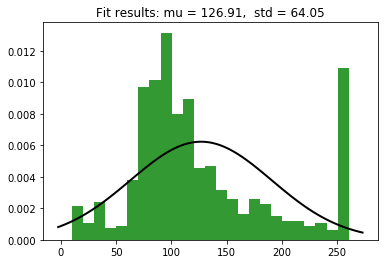

Skewness before boxcox: 0.8347178214668263


In [59]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C1')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C1']))

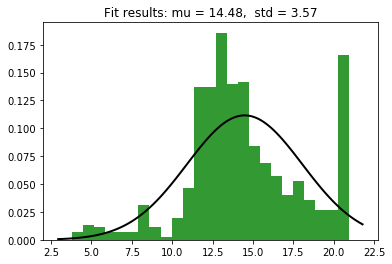

λ parameter of boxcox for C1 equals: 0.4

 The skewness of C1 after boxbox is: 0.027260677627780283


In [60]:
# Box - Cox Transformation
# source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer
# boxcox transformation returns a tuple, value & lambda
# source: https://stackoverflow.com/questions/22889425/replacing-pandas-dataframe-variable-values-with-a-numpy-array

# The boxcox function is a 2d array with for each value a lamba  λ, that is why we call the shape [0], shape[1] is the associated lambda with the data point
data['C1_boxcox'] = boxcox(data['C1'])[0]
lambda_C1_boxcox = boxcox(data['C1'])[1].round(2)

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C1_boxcox')

# print skewness after imputation
skew(data['C1_boxcox'])
# lambda λ - 1 means no transformation took place and 
print('λ parameter of boxcox for C1 equals:', lambda_C1_boxcox)
print(' The skewness of C1 after boxbox is:',skew(data['C1_boxcox']))

In [61]:
# right skewed, since positive skewness, thus we can take the log to normalize
## 1. LOG

# make a copy of the dataframe to test for application of math functions
df_test = data.copy()
df_test['C1_log'] = np.log(data['C1_boxcox'])
## 2. LOG2
df_test['C1_log2'] =  np.log2(data['C1_boxcox'])
## 3. 1/x
df_test['C1_1_div_x'] = 1/(data['C1_boxcox'])
# square root of x
df_test['C1_sqrt'] = np.sqrt(data['C1_boxcox'])
# log of the square root of x
df_test['C1_log_sqrt'] = np.log(df_test['C1_sqrt'])

# print results skewness of math functions
print('Skewness log of C1_boxcox:', skew(df_test['C1_log']))
print('Skewness log2 of C1_boxcox:', skew(df_test['C1_log2']))
print('Skewness 1 divided by x of C1_boxcox:', skew(df_test['C1_1_div_x']))
print('Skewness square root of C1_boxcox:', skew(df_test['C1_sqrt']))
print('Skewness log of square root of C1_boxcox:', skew(df_test['C1_log_sqrt']))

# print our conclusion after testing
print('\n Transformation with additional math functions after boxcox leads to a higher skewness, thus not preferred!')

Skewness log of C1_boxcox: -1.2788819737448278

Skewness log2 of C1_boxcox: -1.2788819737448256

Skewness 1 divided by x of C1_boxcox: 3.3848793352661035

Skewness square root of C1_boxcox: -0.5258303743922768

Skewness log of square root of C1_boxcox: -1.2788819737448285



 Transformation with additional math functions after boxcox leads to a higher skewness, thus not preferred!


> <b> C2 - Top-tier Dummy </b>
 * Dummy variable, set to 1 if leading underwriter of IPO has a rating of 8 or higher, otherwise 0
 * NO TRANSFORMATION NEEDED ON A DUMMY VARIABLE! - included here to note why we skipped this feature

In [62]:
data['C2'].describe()

count     660 
unique    2   
top       True
freq      567 
Name: C2, dtype: object

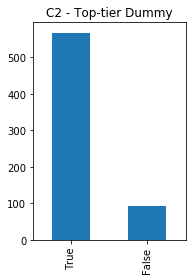

In [63]:
plt.subplot2grid((1,2), (0, 1))
data['C2'].value_counts().plot(kind='bar', title='C2 - Top-tier Dummy')

> <b> C3 - Earnings Per Share </b>
 * Trailing Earnings Per Share (EPS) at the time of the IPO (in dollars)

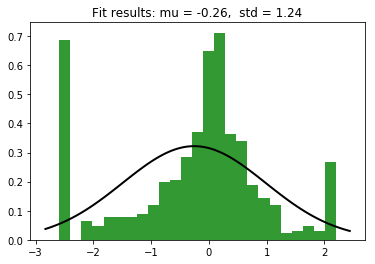

Skewness before boxcox: -0.39458916588789383


In [64]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C3')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C3']))

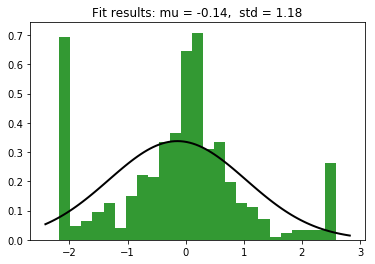

 The skewness of C3 after yeo johnson is: 0.08812896468793462


In [65]:
# add variable boxcox
data['C3_yeojohnson'] = stats.yeojohnson(data['C3'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C3_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C3_yeojohnson'])
print(' The skewness of C3 after yeo johnson is:', skew(data['C3_yeojohnson']))

> <b> C4 - Prior Nasdaq 15-day returns </b>

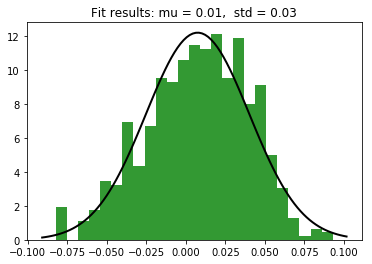

Skewness before boxcox: -0.3137495316157528


In [66]:
# Plot Histogramm C1 with function
plot_hist_norm(df=data, column='C4')

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C4']))

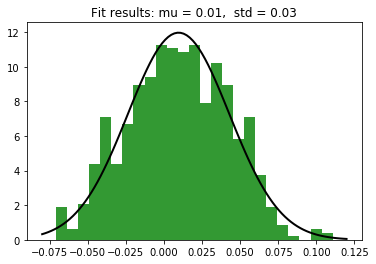

 The skewness of C4 after yeo johnson is: -0.01461170661824803


In [67]:
# add variable boxcox
data['C4_yeojohnson'] = stats.yeojohnson(data['C4'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C4_yeojohnson')

# skewness after applying yeojohnson transformation
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.yeojohnson.html
skew(data['C4_yeojohnson'])
print(' The skewness of C4 after yeo johnson is:', skew(data['C4_yeojohnson']))

> <b> C5 - Outstanding Shares </b>

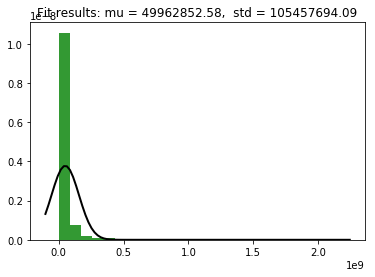

Skewness before boxcox: 13.430698280731715


In [68]:
# Plot Histogramm C5 with function
plot_hist_norm(df=data, column='C5', bin_amount=25)

# metric to evaluate skewness - before imputation
print('Skewness before boxcox:', skew(data['C5']))

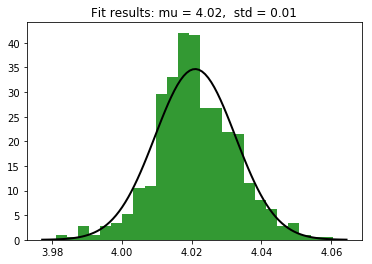

 The skewness of C5 after boxcox is: -0.03837129727888362


In [69]:
# add variable boxcox
data['C5_boxcox'] = boxcox(data['C5'])[0]

# histogram of boxcox transformation
plot_hist_norm(df=data, column='C5_boxcox')

# print skewness of C5
skew(data['C5_boxcox'])
print(' The skewness of C5 after boxcox is:',skew(data['C5_boxcox']))

# Standardization Z-Score - Our Code

In [56]:
# Z-SCORE STANDARDIZATION CODE from DAWN
#Here, I found code at Stackoverflow:
#https://stackoverflow.com/questions/50194821/why-normalization-using-z-score-in-pandas-dataframe-generates-nan-columns

#import numpy as np
#import pandas as pd
#from scipy import stats
from scipy.stats import zscore

#df = pd.DataFrame(pd.read_csv('dataset.csv', sep=','))
#df = df.dropna(how='any') # drop nan entries
#df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers

#print(df.describe())
normalized_df_copy = normalized_df.apply(zscore) # Normalization
normalized_df_copy.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,6.820000e+02,682.000000
mean,-1.002782e-16,2.344166e-17,1.393476e-16,-7.566447e-16,1.242408e-15,7.397146e-16,-1.198129e-16,4.792517e-16,1.015805e-15,3.854851e-16,5.209258e-18,1.777659e-16,1.510685e-16,9.532941e-16,0.000000
std,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734e+00,1.000734
min,-5.013041e+00,-2.718300e+00,-2.239613e+00,-2.716197e+00,-6.505022e+00,-7.125286e+00,-2.463967e+00,-5.557956e+00,-5.710319e+00,-6.362840e+00,-1.459184e+00,-2.667989e+00,-1.060477e+00,-6.287700e+00,-0.757306
25%,-5.147642e-01,-6.497646e-01,-6.939529e-01,-6.910781e-01,-5.812880e-01,-6.374228e-01,-7.310942e-01,-6.298468e-01,-6.453197e-01,-6.279152e-01,-7.131975e-01,-6.896647e-01,-1.060477e+00,-6.052416e-01,-0.757306
50%,-1.120602e-01,5.002520e-02,-1.407140e-01,6.897159e-03,7.381687e-03,-8.135757e-03,-5.635739e-02,-1.570557e-02,5.073860e-03,6.354871e-03,-1.066447e-01,-3.499446e-02,9.429723e-01,-2.068252e-02,-0.757306
75%,5.616058e-01,7.292587e-01,7.158421e-01,6.590012e-01,6.480756e-01,6.451119e-01,5.605940e-01,6.659247e-01,6.263620e-01,6.661392e-01,6.129982e-01,6.292180e-01,9.429723e-01,6.024217e-01,1.033180
max,1.655713e+00,2.658213e+00,1.653354e+00,2.684120e+00,1.944280e+00,2.013670e+00,2.498126e+00,1.949926e+00,1.902458e+00,2.001879e+00,3.845601e+00,2.607542e+00,9.429723e-01,1.868188e+00,1.672757


In [57]:
#Assess skewness of continuous variables after z-score dtandardization
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is -0.6739380238452145
C4_norm skew is -0.30863466620782004
C7_norm skew is 0.17651739543124084
Long_to_Total_Sentences_norm skew is -0.0692497147692689
Pos_to_Total_Words_norm skew is -0.6186639743047377
Neg_to_Total_Words_norm skew is -0.44904768987752947
Uncertain_to_Total_Words_norm skew is 0.4835392181539397
Pos_Neg_Words_norm skew is -0.24145231271059564
Uncertain_to_Pos_Words_norm skew is -0.3072684585172076
Uncertain_to_Neg_Words_norm skew is -0.4749748341837533
Real_to_Total_Words_norm skew is 0.7636623991681253
Long_to_Total_Words_norm skew is 0.13059229047859375
C3P_norm skew is -0.11776350002174833
C5P_norm skew is -0.5305397014595288
C6P_norm skew is 0.6392626201577396


In [58]:
#Conclusion - results very close to above; now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1.

# Standardization Z-Score - Other's Code

> You need to convert the values at the same numeric level.
1.  Method 1: <b> z-score  </b> 
    * use the z-score standardization, which is calculated as shown on [this page](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/).
    * Note: First normalize before you standardize with z-score
2.  Method 2: <b> linear transformation </b> 
    * v’ = [(v - min)/(max - min)] x (newmax - newmin) + newmin
    * Note that if the new range is [0..1], then this simplifies to 
v’ = [(v - min)/(max - min)]



In [122]:
# Save Feature C1 -> before standardization (but after outlier IQR and Normalization)
data['C1_beforezscore'] = data['C1']
data['T4_beforezscore'] = data['T4']

In [123]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 1 for Standardization - Z-score
# -------------------------------------------------------------------------------------------------------------
# create a function for the z-score where you apply it to a list of columns on a specific dataframe you specify
def replace_columns_zscore(df, column_list): 
    # apply z-score to column list
    df[column_list] = df[column_list].apply(zscore)

# apply function on a specified dataframe, for a list of specified columns to replace zero's and nan's with their respective mean
replace_columns_zscore(df=data, column_list=['C1', 'C3', 'C4', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

# test if dataframe changed columns to z-scores
data.head(5)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T4’_boxcox,T5’_boxcox,S1_boxcox,S2_boxcox,S3_boxcox,S1’_boxcox,S2’_boxcox,S3’_boxcox,C1_beforezscore,T4_beforezscore
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,-0.076694,True,1.980558,...,-0.352435,-1.136302,4.789451,3.594124,3.633993,-2.864548,-3.468266,-2.729855,122.0,301.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,2.062388,False,-1.100438,...,-0.348290,-1.141554,4.971579,3.978589,3.903967,-2.958786,-3.367350,-2.731459,259.0,510.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,-0.576333,True,-0.793851,...,-0.355890,-1.122741,4.767718,2.835791,3.168751,-2.687859,-3.665757,-2.715766,90.0,128.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,1.281701,True,-0.527605,...,-0.448158,-1.122980,5.133388,3.198756,3.509516,-2.687859,-3.599764,-2.662944,209.0,177.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,-0.732471,True,0.263067,...,-0.402982,-1.146848,4.893451,3.725898,3.728984,-2.883097,-3.421313,-2.719927,80.0,336.0


# Standardization Min-Max - Our Code

In [47]:
# MIN-MAX NORMALIZATION
# Code for min-max normalization found at Stackoverflow - see here:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

x = normalized_df_copy.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
#normalized_df_copy = pd.DataFrame(x_scaled, columns= normalized_df_copy.columns.tolist())
normalized_df_copy = pd.DataFrame(x_scaled, columns= normalized_df_copy.columns)
normalized_df_copy

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
0,0.458312,0.630418,0.077442,0.534307,0.434365,0.516718,0.455963,0.354183,0.434831,0.389923,0.616847,0.564398,1.0,0.471242,0.622222
1,1.000000,0.384735,0.039063,0.545709,0.232925,0.656497,0.451801,0.142944,0.739759,0.299295,0.520101,0.485313,0.0,1.000000,0.000000
2,0.327366,0.582011,0.011032,0.524798,1.000000,0.302045,0.493203,1.000000,0.084768,0.663571,0.621360,0.772573,0.0,0.406077,0.000000
3,0.814322,0.578004,0.012766,0.268780,1.000000,0.366015,0.643764,1.000000,0.193653,0.683645,0.694835,0.768865,0.0,0.396940,0.000000
4,0.286445,0.259982,0.954944,0.394649,0.389912,0.578929,0.482081,0.282512,0.504547,0.360728,0.422374,0.406499,1.0,0.453073,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.000000,0.489094,0.280985,0.461169,0.638465,0.424020,0.614793,0.613930,0.364327,0.582753,0.731924,0.463360,0.0,0.484339,1.000000
678,0.360102,0.801912,0.038346,0.552094,0.458564,0.511217,0.581565,0.377083,0.498675,0.470253,0.591602,0.634239,0.0,0.578539,0.000000
679,0.417391,0.638242,0.083614,0.553632,0.349183,0.505348,0.377204,0.294793,0.470018,0.350634,0.433146,0.390595,1.0,0.446135,0.000000
680,0.278261,0.649007,0.177905,0.720065,0.670927,0.235355,0.705954,1.000000,0.390708,1.000000,0.621947,0.257653,1.0,0.517739,1.000000


In [48]:
# for feature in normalized_df_copy.columns.to_list():
#     #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
#     print (feature, "skew is",normalized_df_copy[feature].skew())

#Describe the df to make sure all numbers between 0 and 1
normalized_df_copy.describe()

,C1,C4,C7,Long_to_Total_Sentences,Pos_to_Total_Words,Neg_to_Total_Words,Uncertain_to_Total_Words,Pos_Neg_Words,Uncertain_to_Pos_Words,Uncertain_to_Neg_Words,Real_to_Total_Words,Long_to_Total_Words,C3P,C5P,C6P
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,0.473228,0.505588,0.307271,0.502970,0.487664,0.501351,0.496558,0.444518,0.460172,0.471954,0.480554,0.505729,0.529326,0.492001,0.233038
std,0.253023,0.186131,0.336886,0.185310,0.207176,0.201167,0.201676,0.226088,0.226335,0.207335,0.210244,0.189694,0.499506,0.218630,0.345367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306905,0.384735,0.062589,0.375000,0.344607,0.357779,0.349222,0.282806,0.294516,0.322277,0.375000,0.375000,0.000000,0.338217,0.000000
50%,0.396931,0.514892,0.156723,0.504247,0.457891,0.472312,0.485200,0.402259,0.423164,0.441468,0.504941,0.499096,1.000000,0.453700,0.000000
75%,0.584143,0.641226,0.437554,0.625000,0.606764,0.614668,0.609533,0.569684,0.576710,0.593366,0.625000,0.625000,1.000000,0.602930,0.400000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# Conclusion: All variables now scaled to between 0 and 1.

# Standardization Min-Max - Other's Code

In [48]:
# Save Feature C1 -> before standardization (but after outlier IQR and Normalization)
data['C1_beforezscore'] = data['C1']

In [124]:
# -------------------------------------------------------------------------------------------------------------
# Strategy 2 for Standardization - Min-Max 
# -------------------------------------------------------------------------------------------------------------
# source: https://stackoverflow.com/questions/24645153/pandas-dataframe-columns-scaling-with-sklearn
# formula: (x-min_x)/(max_x - min_x)

# create a function for min max standardization (continuous features)
def replace_columns_minmax(df, column_list): 
    scaler = preprocessing.MinMaxScaler()
    # transform using min max function from sklearn.preprocessing.minmax
    df[column_list] = scaler.fit_transform(df[column_list])

# use min-max scalar on continuous features
#replace_columns_minmax(df=data, column_list=['C1', 'C3', 'C4', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

# show dataframe
#data.head(5)

# Standard Dev Outlier - Our Code

In [59]:
# STANDARD DEVIATION OUTLIERS CODE...OBVIOUSLY THIS ONE'S NOT WORKING....
# Code was found here: https://www.kdnuggets.com/2017/02/removing-outliers-standard-deviation-python.html

def std_df_outlier(datacolumn):
    mean = np.mean(datacolumn, axis=0)
    sd = np.std(datacolumn, axis=0) 
    datacolumn[datacolumn<(mean - 2 * sd)] = mean
    datacolumn[datacolumn>(mean + 2 * sd)] = mean
    return datacolumn

normalized_df_copy.apply(std_df_outlier)
normalized_df_copy.describe()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Pos_Neg_Words_norm,Uncertain_to_Pos_Words_norm,Uncertain_to_Neg_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
count,682.000000,682.000000,682.000000,6.820000e+02,682.000000,6.820000e+02,682.000000,6.820000e+02,682.000000,6.820000e+02,682.000000,6.820000e+02,6.820000e+02,6.820000e+02,682.000000
mean,0.149165,0.052339,0.018401,1.975349e-02,0.075209,-3.528756e-02,-0.096836,5.498744e-02,0.063099,-2.372221e-03,-0.093287,-1.771404e-02,1.510685e-16,7.736950e-02,0.000000
std,0.760254,0.876680,0.981086,8.625031e-01,0.869110,8.275254e-01,0.815249,9.188675e-01,0.906074,8.263948e-01,0.847985,8.351113e-01,1.000734e+00,8.672533e-01,1.000734
min,-1.491009,-1.949618,-1.959740,-1.996925e+00,-1.865611,-1.965695e+00,-1.982889,-1.983713e+00,-1.958296,-1.977968e+00,-1.459184,-1.963925e+00,-1.060477e+00,-1.987572e+00,-0.757306
25%,-0.397874,-0.542048,-0.662060,-5.972649e-01,-0.543979,-5.848608e-01,-0.720918,-5.765212e-01,-0.561366,-5.725461e-01,-0.713197,-6.216936e-01,-1.060477e+00,-5.345098e-01,-0.757306
50%,-0.029258,0.050025,-0.140714,-7.566447e-16,0.007382,7.397146e-16,-0.035210,4.792517e-16,0.005074,3.854851e-16,-0.106645,1.777659e-16,9.429723e-01,9.532941e-16,-0.757306
75%,0.561606,0.714294,0.715842,5.992023e-01,0.648076,5.060761e-01,0.433149,6.659247e-01,0.626362,5.835756e-01,0.485740,5.290188e-01,9.429723e-01,6.024217e-01,1.033180
max,1.655713,1.952655,1.653354,1.994674e+00,1.944280,1.987284e+00,1.997040,1.949926e+00,1.902458,1.992190e+00,1.959509,1.988527e+00,9.429723e-01,1.868188e+00,1.672757


In [60]:
#Assess continuous variables for skewness after s.d. outlier detection
for feature in normalized_df_copy.columns.to_list():
    #print (feature, "Shapiro test stat & p-value is",stats.shapiro(normalized_df_copy[feature]))
    print (feature, "skew is",normalized_df_copy[feature].skew())

C1_norm skew is 0.7089423882027451
C4_norm skew is -0.17138944342763446
C7_norm skew is 0.21689839880130088
Long_to_Total_Sentences_norm skew is -0.012249578093206037
Pos_to_Total_Words_norm skew is 0.1749739417522789
Neg_to_Total_Words_norm skew is 0.041031059386484436
Uncertain_to_Total_Words_norm skew is 0.17600799008827547
Pos_Neg_Words_norm skew is 0.16552857916762467
Uncertain_to_Pos_Words_norm skew is 0.15440372761550883
Uncertain_to_Neg_Words_norm skew is -0.04906674100907435
Real_to_Total_Words_norm skew is 0.19251165211440877
Long_to_Total_Words_norm skew is 0.10190917995104556
C3P_norm skew is -0.11776350002174833
C5P_norm skew is 0.2971105843400378
C6P_norm skew is 0.6392626201577396


In [61]:
#Conclusion - results very close to above; now only a few remain outside of the range of -.5 to +.5: c1_norm, Pos_to_Total_Words_norm, Real_to_Total_Words_norm, C5P_norm, and C6P_norm
#Note: All, however, are with the range of -1 to +1...so we are going with it!

# Standard Dev Outlier - Other's Code

In [ ]:
# This note was in there so I figured that I should just put it in here as well

## __NOTE TO TEAM:__ ##
<b> IMPORTANT: </b> ONLY CHOOSE ONE OF THE OUTLIER METHODS AND DON'T RUN IT MORE THAN ONCE - ELSE RESTART THE KERNEL!!!

In [125]:
# testrun for outlier column C1 with company name
data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

,C1,I2
65,1.0,BASIC ENERGY SERVICES INC


In [126]:
# Create a function to calculate the lower and upper bound (mean+-3x st. dev.) to detect outliers and replace them by lower- or upper-bound
def replace_columns_outliers_stdev(df, column_list): 
    for my_col in column_list:
        u_bound = df[my_col].mean() + 3* df[my_col].std()
        l_bound = df[my_col].mean() - 3* df[my_col].std()

        df[my_col][df[my_col] > u_bound] = u_bound
        df[my_col][df[my_col] < l_bound] = l_bound

# Replace outliers by plus/minus 3 times standard deviation dependend if outlier is below or above lower/upper bound
replace_columns_outliers_stdev(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’'])

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [127]:
# test if outlier changed
data.loc[data['I2'] =='BASIC ENERGY SERVICES INC', ['C1', 'I2']]

,C1,I2
65,0.288002,BASIC ENERGY SERVICES INC


 ##  __6.1: Outlier IQR__(Not Used) ##

In [128]:
# TEST IQR FOR 1 COLUMN for FUNCTION
#data['C4'].describe()

In [129]:
# IQR #
# create a function for min max standardization (continuous features)
#def replace_columns_outliers_iqr(df, column_list): 
    #for my_col in column_list:
        #Q1 = df[my_col].quantile(0.25)
        #Q3 = df[my_col].quantile(0.75)
        #IQR = Q3 - Q1

        #u_bound_q3 = (Q3 + 1.5 * IQR)
        #l_bound_q1 = (Q1 - 1.5 * IQR)

        #df[my_col][df[my_col] > u_bound_q3] = u_bound_q3
        #df[my_col][df[my_col] < l_bound_q1] = l_bound_q1
    
#replace_columns_outliers_iqr(df=data, column_list=['C1', 'C3', 'C4', 'C5’', 'C6’', 'C7', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']) 

In [130]:
# TEST IQR FOR COLUMN for FUNCTION, check if descriptives changed
#data['C4'].describe()

# Correlation - Our Code

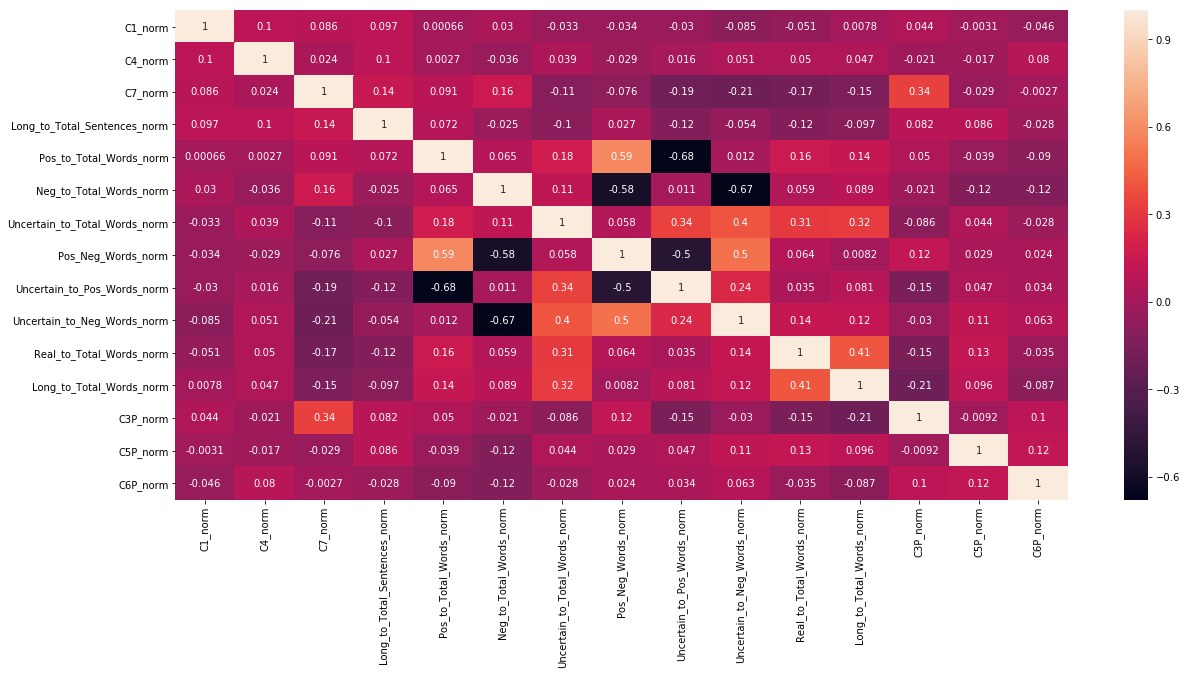

In [62]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# Add Corr with functions
spearman =normalized_df_copy.corr(method ='spearman')
pl.figure(figsize=(20,9))
sns.heatmap(spearman, annot=True)

In [63]:
#Conclusion 
#In light of the above, we have decided to exclude the following variables:

# Pos_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Uncertain_to_Pos_Words_norm (-)
#    Pos_to_Total_Words_norm (+) and Uncertain_to_Negative_Words_norm (+)

# Uncertain_to_Pos_Words_norm, which has sizeable intercorrlations with Pos_to_Total_Words_norm (-), Uncertain_to_Total_Words_norm (+),
#    Pos_Neg_Words_norm (-), Uncertain_to_Neg_Words_norm (+)

# Uncertain_to_Neg_Words_norm, which has sizeable intercorrlations with Neg_to_Total_Words_norm (-), Pos_Neg_Words_norm (+),
#    Uncertain_to_Total_Words_norm (+), Uncertain_to_Pos_Words_norm (+)
# Note: C6P_norm needs to be removed from Y1 becasue duplicative

In [64]:
#Removing the variables noted above

post_corr_list = normalized_df.columns.tolist()
normalized_df_copy.drop(normalized_df_copy.columns[[7,8,9]], axis=1, inplace=True)
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474
...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757


In [ ]:
# Adding back the categorical variables

In [65]:
normalized_df_copy[categorical_list] = df_impute_copy.loc[:,categorical_list]
normalized_df_copy

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757,1.0,ZIP,ZIPCAR INC,7514.0,0,1
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757,1.0,ZUMZ,Zumiez Inc,5600.0,0,0


In [66]:
# # evaluates ranked variables or ordinal
# # used if we have not normalized first
# # prefered in small samples or if there are outliers
# # more accurate than spearman
# kendall = norm_df.corr(method ='kendall')
# sns.heatmap(kendall, annot=True)

In [67]:
# # used to evaluate continuous variables
# # is prefered for our dataset
# # need to normalize before we calcualte
# pearson = norm_df.corr(method ='pearson')
# sns.heatmap(pearson, annot=True)

# Correlation - Other's Code

In [273]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
data_corr = data[['C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'C5’', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']] 

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

In [274]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables
# conclusion: we need to drop one of the variables in our analysis - test which one leads to a better accuracy for Y1 & Y2!
# 1. C5 - (Outstanding Shares) is highly correlated with C6 (Offering Shares) -> 0.881230
# 2. T2’ - (Number of Words/Number of Sentences) is higly correlated with T4’ (Number of Long Sentences / Number of Sentences)

Top Absolute Correlations


C5   C6     0.890700
T2’  T4’    0.876846
dtype: float64

In [275]:
# define correlation matrix (absolute corr values)

# original and calculated features (before normalization)
#data_corr = data[['C1', 'C3', 'C4', 'C7', 'C5’', 'T2’', 'T3’', 'T4’', 'T5’',  'S1’', 'S2’', 'S3’']] 

# all the features excluding original features that where transformed and excluding boolean/binary features
data_corr = data[['C1_boxcox', 'C3_yeojohnson','C4_yeojohnson', 'C5_boxcox', 'C5’_boxcox', 'C6_boxcox', 'C6’_yeo-johnson', 'C7_yeojohnson', \
                  'T1_boxcox', 'T2_boxcox', 'T2’_boxcox', 'T3_boxcox',  'T3’_boxcox', 'T4_boxcox', 'T4’_boxcox', 'T5_boxcox', 'T5’_boxcox',  \
                  'S1_boxcox', 'S1’_boxcox', 'S2_boxcox',  'S2’_boxcox', 'S3_boxcox','S3’_boxcox']]

# define a correlation matrix
corr_matrix = data_corr.corr().abs()

# show correlation matrix
#corr_matrix

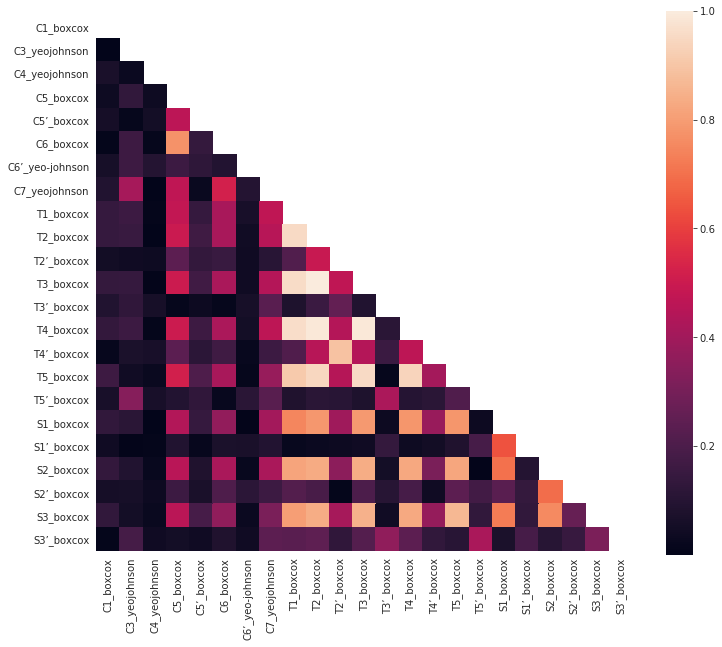

In [276]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

### Correlation Features after normalization ###

In [277]:
#source:  https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

# create a function to drop the redundant pairs in the correlation matrix (all correlations are mirrored diagionaly)
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
# show top 'n' correlations (n=50)
get_top_abs_correlations(data_corr, n=50)

# only show correlations higher or equal to 0.5
get_top_abs_correlations(data_corr, n=50)[get_top_abs_correlations(data_corr, n=50) >= 0.5]

# Our threshold is set to 0.5 for dropping either one of the highly correlated variables
# conclusion: we need to drop one of the variables in our analysis - test which one leads to a better accuracy for Y1 & Y2!
# 1. C5 - (Outstanding Shares) is highly correlated with C6 (Offering Shares) -> 0.881230
# 2. T2’ - (Number of Words/Number of Sentences) is higly correlated with T4’ (Number of Long Sentences / Number of Sentences)

Top Absolute Correlations


T2_boxcox   T3_boxcox        0.997402
T3_boxcox   T4_boxcox        0.991097
T2_boxcox   T4_boxcox        0.989774
T1_boxcox   T4_boxcox        0.961795
            T3_boxcox        0.959634
            T2_boxcox        0.956057
T3_boxcox   T5_boxcox        0.954348
T2_boxcox   T5_boxcox        0.947324
T4_boxcox   T5_boxcox        0.939650
T1_boxcox   T5_boxcox        0.912324
T2’_boxcox  T4’_boxcox       0.891310
T5_boxcox   S3_boxcox        0.866042
T3_boxcox   S3_boxcox        0.848243
            S2_boxcox        0.838558
T2_boxcox   S3_boxcox        0.838446
            S2_boxcox        0.834197
T4_boxcox   S3_boxcox        0.829690
            S2_boxcox        0.824790
T5_boxcox   S2_boxcox        0.823249
T1_boxcox   S2_boxcox        0.817249
            S3_boxcox        0.801916
T3_boxcox   S1_boxcox        0.791216
T2_boxcox   S1_boxcox        0.787233
T4_boxcox   S1_boxcox        0.784012
T5_boxcox   S1_boxcox        0.781680
C5_boxcox   C6_boxcox        0.777260
S2_boxcox   

In [278]:
# simple heatmap
#ax = sns.heatmap(corr_matrix, linewidths=.5)

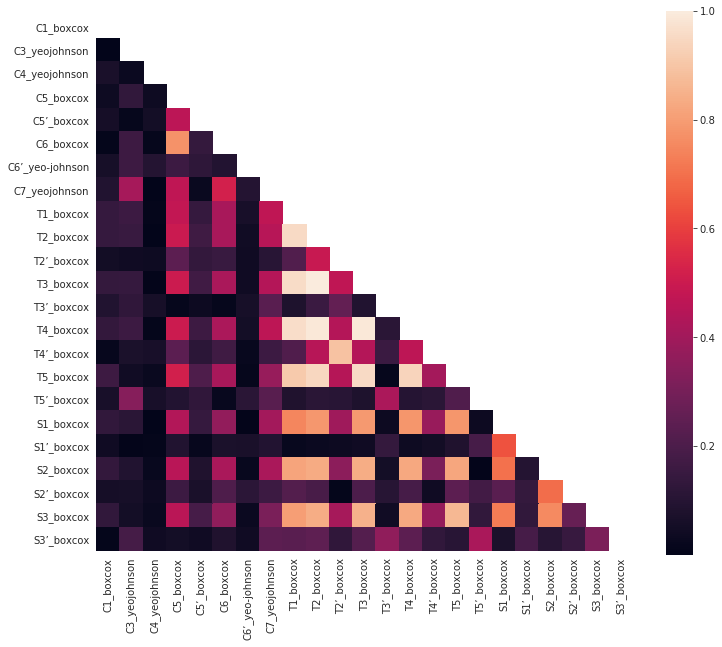

In [279]:
# 2nd heatmap without duplicates
# source: https://seaborn.pydata.org/generated/seaborn.heatmap.html
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=1, square=True)

# Binning - Our Code -- From Tao*

In [68]:
normalized_df_copy.dtypes

C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
dtype: object

In [69]:
# normalized_df_copy['I3']= normalized_df_copy['I3'].astype('float')
# #df_copy['C2'] = df_copy['C2'].astype('category')
# normalized_df_copy.dtypes

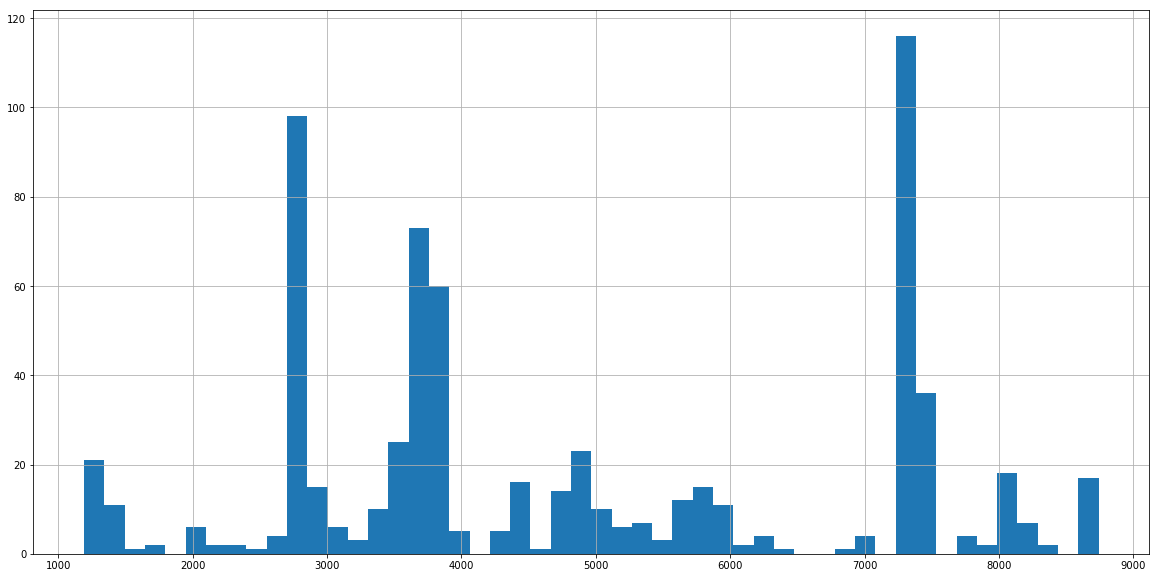

In [70]:
#Prepare a histogram of SIC Codes to visualize if binning might make sense
normalized_hist=normalized_df_copy.iloc[:,-3]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

In [71]:
#Note: See here: https://www.brookings.edu/wp-content/uploads/2016/06/specialization.pdf - "High Tech" companies are: SIC 357x, 36xx, 38xx, 737x
#Thus, we are going to bin as "High Tech" (using those 4 SIC codes) and "Non-High Tech" (using all other)

In [72]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "High Tech" vs. "Non-High Tech"

def high_tech_bins(H):
    if (H >= 3570 and H < 3580) | (H >= 3600 and H < 3700) | (H >= 3800 and H < 3900) | (H >= 7370 and H < 7380):   # Creating a bin value of 1 for SICs in High Tech
        return(1)
    else:
        return(0)        #Creating a bin value of 0 for all others
   
normalized_df_copy['I3_tech'] = normalized_df_copy['I3'].apply(high_tech_bins)  # Creating a new column high_tech_bins in the dataframe

normalized_df_copy.head()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech
0,0.128561,0.671152,-0.580255,0.169230,-0.106115,0.208265,-0.201435,0.559291,0.309510,0.942972,0.059070,1.317286,1.0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,0,1,1
1,1.655713,-0.649765,-0.918712,0.230803,-1.306342,0.817525,-0.222091,-0.024214,-0.107703,-1.060477,1.868188,-0.757306,0.0,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,1,0,0
2,-0.416945,0.410889,-1.372977,0.117878,1.944280,-0.993496,-0.016648,0.588934,1.407745,-1.060477,-0.248109,-0.757306,1.0,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,1,0,0
3,1.214407,0.389348,-1.329764,-1.264698,1.944280,-0.588021,0.730451,1.101944,1.388182,-1.060477,-0.293752,-0.757306,1.0,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,1,1,0
4,-0.617033,-1.320500,1.593986,-0.584969,-0.332305,0.491498,-0.071834,-0.512809,-0.523488,0.942972,-0.023571,0.832474,1.0,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,0,1,0


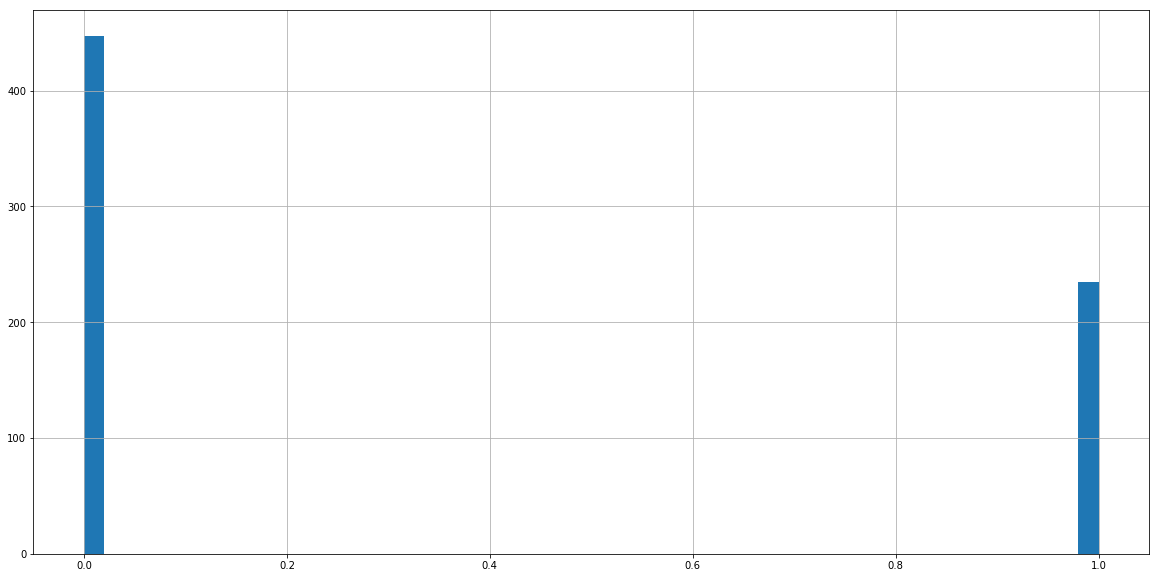

In [73]:
normalized_hist=normalized_df_copy.iloc[:,-1]
normalized_hist.hist(bins=50,figsize=(20,10))

In [74]:
#BINNING FOR MANUFACTURING VS SERVICES VS OTHER
#Note: See here: https://www.naics.com/sic-codes-industry-drilldown/ 
#Manufacturing --> SIC 20xx-3999; Services --> SIC 70xx-8999
#Thus, we are going to bin as "Manufacturing" (using SIC codes 20xx-3999),
#"Servies" (using SIC codes 70xx-8999) and "Other" (using all other)

In [75]:
# #Creating Bins for ploting and understanding of the target 

# ## Binning for "Manufacturing", "Service" and "Other"

def mfg_svc_other_bins(M):
    if (M >= 2000 and M < 4000):   # Creating a bin value of 1 for SICs in Manufacturing
        return(1)
    if (M >= 7000 and M < 9000):   # Creating a bin value of 2 for SICs in Service
        return(2)
    else:
        return(0)   # Creating a bin value of 0 for all others

normalized_df_copy['I3_mfg'] = normalized_df_copy['I3'].apply(mfg_svc_other_bins)  # Creating a new column mfg_svc_other_bins in the dataframe

normalized_df_copy.tail()

,C1_norm,C4_norm,C7_norm,Long_to_Total_Sentences_norm,Pos_to_Total_Words_norm,Neg_to_Total_Words_norm,Uncertain_to_Total_Words_norm,Real_to_Total_Words_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,C6P_norm,C2,I1,I2,I3,Y1,Y2,I3_tech,I3_mfg
677,1.655713,-0.088679,0.310200,-0.225740,0.770539,-0.259475,0.586694,1.382660,-0.223521,-1.060477,0.117330,1.672757,1.0,ZIP,ZIPCAR INC,7514.0,0,1,0,2
678,-0.268583,1.593192,-0.926849,0.265288,0.010575,0.182149,0.421813,0.397455,0.677960,-1.060477,0.508230,-0.757306,1.0,ZLTQ,Zeltiq Aesthetics Inc,3845.0,1,1,1,1
679,-0.029258,0.713216,-0.537296,0.273593,-0.555185,0.154076,-0.592247,-0.463924,-0.607392,0.942972,-0.055711,-0.757306,0.0,ZSTN,"ZST Digital Networks, Inc.",3663.0,0,0,1,1
680,-0.659305,0.771095,-0.050119,1.172383,0.891811,-1.482795,1.039045,0.592802,-1.308734,0.942972,0.261297,1.672757,1.0,ZUMZ,Zumiez Inc,5600.0,0,0,0,0
681,1.655713,0.534566,1.653354,0.599967,1.440324,0.079311,0.820820,0.283275,0.352759,0.942972,-0.333216,0.992473,1.0,ZZ,SEALY CORP,2510.0,0,0,0,1


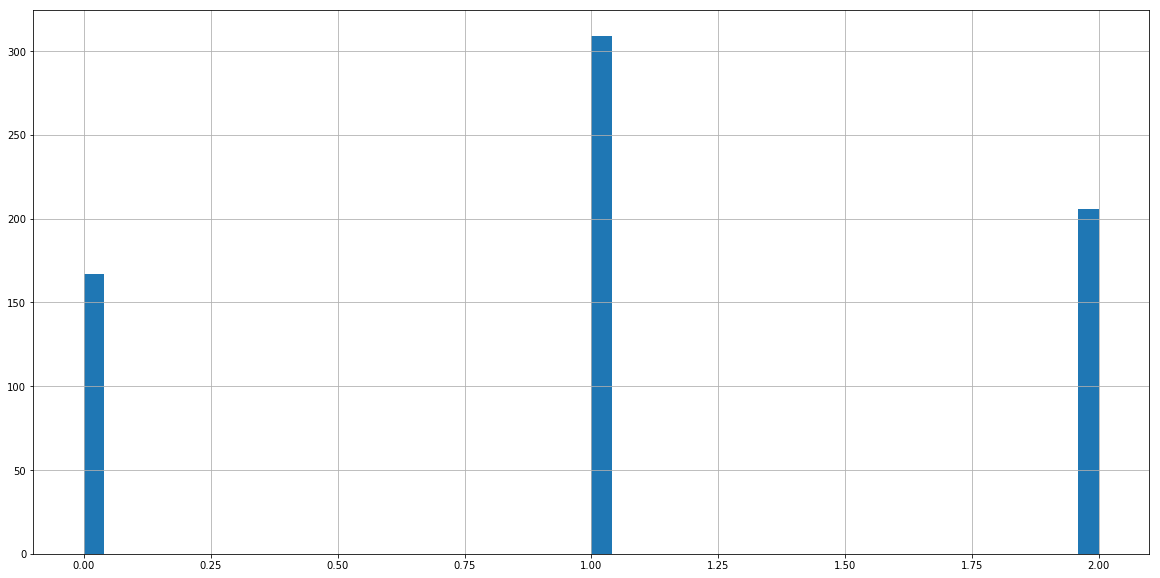

In [76]:
normalized_hist=normalized_df_copy.iloc[:,-1]
# normalized_hist.plot.hist(bins=50)
normalized_hist.hist(bins=50,figsize=(20,10))

# Binning - Other's Code

In [ ]:
# Binning for each individual feature, again I only put a few in here becasue it's so long

### __8: Binning - Categorical__
> For categorical data, you might want to recode them. 
<br> For instance, since you need to use AUC as the evaluation metric, you should convert the target(s) to binary (two classes). 
<br> Also, you should recode any categorical variable(s) with no more than 5 classes.

#### <b> 8.1 Binning SIC Codes </b> ##

In [134]:
# Bin SIC Codes - create new column with INDUSTRY based SIC Codes
# Source: https://en.wikipedia.org/wiki/Standard_Industrial_Classification

## creating a function for binning SIC Codes into categories
def assign_sic_category(sic_code_string):
    try:
        # convert string to integer
        sic_code = int(sic_code_string)

        if sic_code >= 100 and sic_code <= 999:             # 0100-0999 Agriculture, Forestry and Fishing
            return('Agriculture, Forestry and Fishing')
        elif sic_code >= 1000 and sic_code <= 1499:         # 1000-1499 Mining
            return('Mining')
        elif sic_code >= 1500 and sic_code <= 1799:         # 1500-1799 Construction
            return('Construction')             
        elif sic_code >= 1800 and sic_code <= 1999:         # 1800-1999 not used  
            return('not used')
        elif sic_code >= 2000 and sic_code <= 3999:         # 2000-3999 Manufacturing
            return('Manufacturing')
        elif sic_code >= 4000 and sic_code <= 4999:         # 4000-4999 Transportation, Communications, Electric, Gas and Sanitary service
            return('Transportation, Communications, Electric, Gas and Sanitary service') 
        elif sic_code >= 5000 and sic_code <= 5199:         # 5000-5199 Wholesale Trade
            return('Wholesale Trade')
        elif sic_code >= 5200 and sic_code <= 5999:         # 5200-5999 Retail Trade
            return('Retail Trade')
        elif sic_code >= 6000 and sic_code <= 6799:         # 6000-6799 Finance, Insurance and Real Estate
            return('Finance, Insurance and Real Estate')
        elif sic_code >= 7000 and sic_code <= 8999:         # 7000-8999 Services
            return('Services')
        elif sic_code >= 9100 and sic_code <= 9729:         # 9100-9729 Public Administration
            return('Public Administration')
        elif sic_code >= 9900 and sic_code <= 9999:         # 9900-9999 Nonclassifiable
            return('Nonclassifiable')
        else:
            return None
    except:
        print('Error - The Sic Code(s) in the dataset cannnot be converted to an integer!') 
    
# Creating a new column called 'SIC_category' in the dataframe and bin the SIC codes using the function above    
data['SIC_category'] = data['I3'].apply(assign_sic_category)  

# test if new column has been made with different categories
data.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,T5’_boxcox,S1_boxcox,S2_boxcox,S3_boxcox,S1’_boxcox,S2’_boxcox,S3’_boxcox,C1_beforezscore,T4_beforezscore,SIC_category
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,-0.076694,True,1.980558,...,-1.136302,4.789451,3.594124,3.633993,-2.864548,-3.468266,-2.729855,122.0,301.0,Manufacturing
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,2.062388,False,-1.100438,...,-1.141554,4.971579,3.978589,3.903967,-2.958786,-3.367350,-2.731459,259.0,510.0,Manufacturing
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,-0.576333,True,-0.793851,...,-1.122741,4.767718,2.835791,3.168751,-2.687859,-3.665757,-2.715766,90.0,128.0,Manufacturing
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,1.281701,True,-0.527605,...,-1.122980,5.133388,3.198756,3.509516,-2.687859,-3.599764,-2.662944,209.0,177.0,Manufacturing
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,-0.732471,True,0.263067,...,-1.146848,4.893451,3.725898,3.728984,-2.883097,-3.421313,-2.719927,80.0,336.0,"Transportation, Communications, Electric, Gas and Sanitary service"
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,-0.513878,True,0.254998,...,-1.153014,4.789451,3.483317,3.769938,-2.946350,-3.746214,-2.757043,94.0,328.0,Services
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,0.016989,True,-1.302140,...,-1.154890,5.167036,3.539161,3.618668,-2.848304,-3.630385,-2.807874,128.0,379.0,Manufacturing
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,-0.560719,False,-0.390448,...,-1.140102,4.629918,3.608109,3.565068,-2.863299,-3.387995,-2.731699,91.0,276.0,Manufacturing
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,-0.420196,True,-0.204882,...,-1.122489,4.700475,3.626157,3.897739,-2.917032,-3.517838,-2.602552,100.0,335.0,Services
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,-0.326513,True,1.408733,...,-1.143674,5.150309,3.446575,3.663200,-2.704790,-3.431734,-2.595810,106.0,198.0,Manufacturing


In [135]:
# count unique categories for dataframe
print('There are', data['SIC_category'].nunique(), 'unique categories for SIC codes!')

# count the number of sic_codes per category/bin and sort them descending
data.groupby(['SIC_category'])['I3'].agg(['count']).sort_values(by=['count'], ascending=False)

There are 9 unique categories for SIC codes!


,count
SIC_category,
Manufacturing,298
Services,202
"Transportation, Communications, Electric, Gas and Sanitary service",58
Retail Trade,50
Mining,31
Wholesale Trade,14
"Finance, Insurance and Real Estate",5
"Agriculture, Forestry and Fishing",1
Construction,1


In [136]:
# --------------------------------------------------------------------------------------------
# Goal: Visually Inspect how balanced the dataset is for Y1 & Y2 True/False values by SIC Code Category
# --------------------------------------------------------------------------------------------
# create a multi-indexed dataframe for Y1 - group by SIC code category and how many True/False
df_sic_y1 = data.groupby(['SIC_category', 'Y1'])['Y1'].agg(['count'])

# create a multi-indexed dataframe for Y2 - group by SIC code category and how many True/False
df_sic_y2 = data.groupby(['SIC_category', 'Y2'])['Y2'].agg(['count'])

# combined dataframes Y1 & Y2 grouped by SIC Code category and True/False
df_sic_y1_y2 = pd.concat([df_sic_y1, df_sic_y2], axis=1)

# rename column headers of multi-index dataframe
df_sic_y1_y2.columns = ['Y1_count', 'Y2_count']

# show dataframe with Y1/Y2 True and False by SIC Code Category
df_sic_y1_y2

Y1_count  \
Agriculture, Forestry and Fishing                                  False NaN         
                                                                   True   1.0        
Construction                                                       True   1.0        
Finance, Insurance and Real Estate                                 False  4.0        
                                                                   True   1.0        
Manufacturing                                                      False  139.0      
                                                                   True   159.0      
Mining                                                             False  14.0       
                                                                   True   17.0       
Retail Trade                                                       False  34.0       
                                                                   True   16.0       
Services                                                           False  107.0      
                                                                   True   95.0       
Transportation, Communications, Electric, Gas and Sanitary service False  25.0       
                                                                   True   33.0       
Wholesale Trade                                                    False  7.0        
                                                                   True   7.0        

                                                                          Y2_count  
Agriculture, Forestry and Fishing                                  False  1.0       
                                                                   True  NaN        
Construction                                                       True   1.0       
Finance, Insurance and Real Estate                                 False  1.0       
                                                                   True   4.0       
Manufacturing                                                      False  85.0      
                                                                   True   213.0     
Mining                                                             False  18.0      
                                                                   True   13.0      
Retail Trade                                                       False  14.0      
                                                                   True   36.0      
Services                                                           False  49.0      
                                                                   True   153.0     
Transportation, Communications, Electric, Gas and Sanitary service False  26.0      
                                                                   True   32.0      
Wholesale Trade                                                    False  5.0       
                                                                   True   9.0

In [137]:
# ----------------------------------------------------
# Strategy 1 - Aggregate groups and Bin them
# ----------------------------------------------------
# It would make sense to aggregate further, to reduce the number of categories and bin the less frequent occurrences together

# For example:
# Category 1: Manufacturing
# Category 2: (Services+Transport... service)
# Category 3: (Retail Trade + Wholesale Trade)
# Category 4: Other

# ----------------------------------------------------
# Strategy 2 - Bin each category as Binary (1 or 0)
# ----------------------------------------------------

# First create a function to return 1 if value equals SIC category predefined by user, for example: 'Manufacturing' ELSE return 0
def assign_sic_bin(sic_category, category):
    if sic_category is category:
        return(1)
    else:
        return(0)

# Then create new columns for each SIC Category and make it binary by applying the previous function
# note: not very useful probably some columns because they have too few observations but we can deal with that with feature selection later
data['SIC_Manufacturing'] = data['SIC_category'].apply(assign_sic_bin, category='Manufacturing').astype(int)   
data['SIC_Services'] = data['SIC_category'].apply(assign_sic_bin, category='Services').astype(int)     
data['SIC_Transport'] = data['SIC_category'].apply(assign_sic_bin, category='Transportation, Communications, Electric, Gas and Sanitary service').astype(int)     
data['SIC_RetailTrade'] = data['SIC_category'].apply(assign_sic_bin, category='Retail Trade').astype(int) 
data['SIC_Mining'] = data['SIC_category'].apply(assign_sic_bin, category='Mining').astype(int)
data['SIC_WholesaleTrade'] = data['SIC_category'].apply(assign_sic_bin, category='Wholesale Trade').astype(int)
data['SIC_Finance'] = data['SIC_category'].apply(assign_sic_bin, category='Finance, Insurance and Real Estate').astype(int)
data['SIC_Construction'] = data['SIC_category'].apply(assign_sic_bin, category='Construction').astype(int)
data['SIC_Agriculture'] = data['SIC_category'].apply(assign_sic_bin, category='Agriculture, Forestry and Fishing').astype(int)

# test by visually inspecting first n rows in df (n=3) if new columns are added to the dataframe
data.head(3)

# test if datatypes are all boolean of new columns (which are the last 9 columns)
data.iloc[:,-9:].dtypes

SIC_Manufacturing     int64
SIC_Services          int64
SIC_Transport         int64
SIC_RetailTrade       int64
SIC_Mining            int64
SIC_WholesaleTrade    int64
SIC_Finance           int64
SIC_Construction      int64
SIC_Agriculture       int64
dtype: object

## <b> 8.2 Binning Company Names </b> ##

In [138]:
# ---------------------------------------------------------------------------------------------------------------------------------------------
# I2 - Company Name => Recode column
# ---------------------------------------------------------------------------------------------------------------------------------------------
# by extracting text: INC, INC. CO, CORP, Ltd, LTD, LLC, N.V., L.P. (exception companies examples: 'Fabrinet', 'TELVENT GIT S A', 'CREATIVE REALITIES,' )
# use regex [space]&pattern to find
# source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
# example bin them binary by column (INC/CO/LTD/OTHER based on how many observations in each category)
# or label them 1,2,3,4,5 in one column (to help against the curse of dimentionality)

# Inc
data['I2_inc'] = np.where((data['I2'].str.contains(" inc$| inc.$| Inc.$|Inc.\s| inc\s", regex=True, case=False)), 1, 0)

# CO
data['I2_co'] = np.where((data['I2'].str.contains(" co$| co.$| corp.$| corp$| co\s$| corp\s$| corp.\s$", regex=True, case=False)), 1, 0)
data[['I2', 'I2_inc', 'I2_co']].head(15)

# LTD
data['I2_ltd'] = np.where((data['I2'].str.contains(" ltd$| ltd.$| ltd\s| ltd.\s$", regex=True, case=False)), 1, 0)

# print number of rows for INC, CO, LTD
print('Number of rows with variations of INC:', data['I2_inc'].sum())
print('Number of rows with variations of CO:', data['I2_co'].sum())
print('Number of rows with variations of LTD:', data['I2_ltd'].sum())
print('Number of rows remaining:', data[data['I2_inc']+data['I2_co']+data['I2_ltd'] < 1]['I2'].count())

# test number of rows where non-exclusive inc, co, ltd, if dummy variables per row add up to more than 1
data[data['I2_inc']+data['I2_co']+data['I2_ltd'] > 1]

# show remaining values without pattern included
data[data['I2_inc']+data['I2_co']+data['I2_ltd'] < 1][['I2', 'I2_inc', 'I2_co', 'I2_ltd']]

# show added dummy variables
#data[['I2', 'I2_inc', 'I2_co', 'I2_ltd']].tail(15)

Number of rows with variations of INC: 508

Number of rows with variations of CO: 104

Number of rows with variations of LTD: 28

Number of rows remaining: 20


,I2,I2_inc,I2_co,I2_ltd
175,Dolan Co.,0,0,0
191,"DreamWorks Animation, LLC",0,0,0
234,Fabrinet,0,0,0
285,CASCAL N.V.,0,0,0
294,"INTERLINE BRANDS, INC./DE",0,0,0
361,Manchester United plc,0,0,0
396,METALS USA HOLDINGS,0,0,0
412,Nielsen Holdings plc,0,0,0
425,NXP Semiconductors N.V.,0,0,0
468,PRA International,0,0,0


In [139]:
# Convert datatype
data['I2_inc'].astype(int)
data['I2_co'].astype(int)
data['I2_ltd'].astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
677    0
678    0
679    0
680    0
681    0
Name: I2_ltd, Length: 660, dtype: int64

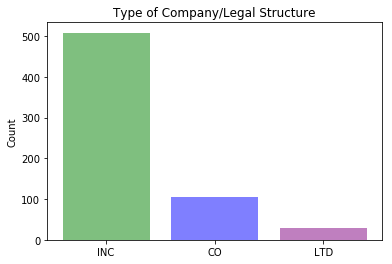

In [140]:
# Plot a Barchart / Visualize categories of type of company
# source: https://pythonspot.com/matplotlib-bar-chart/

# data to plot
# get the aggregate sum of a dummy variable set equal to 1 for inc, co, ltd, respectively
count_inc = data['I2_inc'].sum()
count_co = data['I2_co'].sum()
count_ltd = data['I2_ltd'].sum()

# define the categories
objects = ('INC', 'CO', 'LTD')
y_pos = np.arange(len(objects))
x_s = [count_inc, count_co, count_ltd]

# plot the barchart with x variables, alpha = set to opaqueness, colors are defined for each category
plt.bar(y_pos, x_s, align='center', alpha=0.5, color=('green', 'blue', 'purple'))
plt.xticks(y_pos, objects)
plt.ylabel('Count') # set the y label
plt.title('Type of Company/Legal Structure') # set the title of the barchart
plt.show() # plot the graph

In [141]:
# Create a table whereby you can visually inspect how balanced the Y1 True/False are for each category (inc/co/ltd)
df_inc_y1 = data.groupby(['I2_inc', 'Y1'])['Y1'].agg(['count'])
df_co_y1 = data.groupby(['I2_co', 'Y1'])['Y1'].agg(['count'])
df_ltd_y1 = data.groupby(['I2_ltd', 'Y1'])['Y1'].agg(['count'])

# combine 3 dataframes
df_y1_combined = pd.concat([df_inc_y1, df_co_y1, df_ltd_y1], axis=1)

# rename columns
df_y1_combined.columns = ['inc', 'co', 'ltd']

# show for each category how many are false/true for Y1
# to inspect if there are more true/false in one of the categories for Y1, to inspect which category could be a good predictor for Y1
df_y1_combined

# how to read table: for example if a company is incorporated, there are 508 total of which 259 have a False/zero for underpricing and 249 which have True/1, for the ones that are not inc, there are 71 that are False/0 and thus not underpriced and 81 are underpriced
# conclusion: there are slightly less incorporated companies underpriced, there are slightly more corporations underpriced and slightly more ltd's underpriced
# these variables might help in the explanatory power for target variable: Y1 (Pre-IPO Price Revision)

inc   co  ltd
I2_inc Y1                  
0      False  71   280  319
       True   81   276  313
1      False  259  50   11 
       True   249  54   17

In [142]:
# Create a table whereby you can visually inspect how balanced the Y2 True/False are for each category (inc/co/ltd)
df_inc_y2 = data.groupby(['I2_inc', 'Y2'])['Y2'].agg(['count'])
df_co_y2 = data.groupby(['I2_co', 'Y2'])['Y2'].agg(['count'])
df_ltd_y2 = data.groupby(['I2_ltd', 'Y2'])['Y2'].agg(['count'])

# combine 3 dataframes
df_y2_combined = pd.concat([df_inc_y2, df_co_y2, df_ltd_y2], axis=1)

# rename columns
df_y2_combined.columns = ['inc', 'co', 'ltd']
df_y2_combined

# conclusion: these dummy variables might help as predictors for Y2 (Post-IPO Initial Return)
# but feature selection in the next chapter will examine if they are included in our final model

inc   co  ltd
I2_inc Y2                  
0      False  53   161  191
       True   99   395  441
1      False  146  38   8  
       True   362  66   20

## <b> 8.3 Binning C1_boxcox </b> ##
> <b> binning in 2 up to 5 bins </b>

In [143]:
print(data['C1_beforezscore'].describe())
print('median C1 before z-score, but after outlier iqr and normalization:', data['C1_beforezscore'].median())

count    660.000000

mean     126.911932

std      64.094744 

min      10.000000 

25%      85.000000 

50%      107.000000

75%      155.250000

max      260.625000

Name: C1_beforezscore, dtype: float64

median C1 before z-score, but after outlier iqr and normalization: 107.0


In [144]:
# Binning C1 #
# Binning C1_boxcox in either 2,3,4,5 bins
data['C1_binned_2'] = pd.qcut(data['C1_boxcox'], q=2, labels=False)
data['C1_binned_3'] = pd.qcut(data['C1_boxcox'], q=3, labels=False)
data['C1_binned_4'] = pd.qcut(data['C1_boxcox'], q=4, labels=False)
data['C1_binned_5'] = pd.qcut(data['C1_boxcox'], q=5, labels=False)

> <b> binning binary (more or less than median days) </b>

In [145]:
# create new binary variable for C1
data['C1_more_than_median_days_binary'] = np.where((data['C1_beforezscore'] > data['C1_beforezscore'].median()), 1, 0)

# show number in each class (binary, either 1 OR 0), where 1 is when Days is > median, ELSE 0 
data['C1_more_than_median_days_binary'].value_counts()

# conclusion: variable doesn't help in current most optimal models for Y1 or Y2 for F1-score improvement

0    333
1    327
Name: C1_more_than_median_days_binary, dtype: int64

> <b> binning binary (more or less than mean days) </b>

In [146]:
# create new binary variable for C1
data['C1_more_than_mean_days_binary'] = np.where((data['C1_beforezscore'] > data['C1_beforezscore'].mean()), 1, 0)
data['C1_more_than_mean_days_binary'].value_counts()

0    424
1    236
Name: C1_more_than_mean_days_binary, dtype: int64

> <b> binning binary (more or less than x days) </b>

In [147]:
# create new binary variable for C1
data['C1_more_than_60_days_binary'] = np.where((data['C1_beforezscore'] > 60), 1, 0)
data['C1_more_than_60_days_binary'].value_counts()

# conclusion: variable doesn't help improve - but score stays the same for optimal models for Y1 and F-1 score becomes lower for Y2

1    612
0    48 
Name: C1_more_than_60_days_binary, dtype: int64

In [148]:
# create new binary variable for C1
data['C1_more_than_90_days_binary'] = np.where((data['C1_beforezscore'] > 90), 1, 0)

data['C1_more_than_90_days_binary'].value_counts()

1    456
0    204
Name: C1_more_than_90_days_binary, dtype: int64

In [149]:
# create new binary variable for C1
data['C1_more_than_15_days_binary'] = np.where((data['C1_beforezscore'] > 15), 1, 0)
data['C1_more_than_15_days_binary'].value_counts()

1    653
0    7  
Name: C1_more_than_15_days_binary, dtype: int64

In [150]:
# create new binary variable for C1
data['C1_more_than_40_days_binary'] = np.where((data['C1_beforezscore'] > 40), 1, 0)
data['C1_more_than_40_days_binary'].value_counts()

1    623
0    37 
Name: C1_more_than_40_days_binary, dtype: int64

In [151]:
# create new binary variable for C1
data['C1_more_than_45_days_binary'] = np.where((data['C1_beforezscore'] > 45), 1, 0)
data['C1_more_than_45_days_binary'].value_counts()

1    619
0    41 
Name: C1_more_than_45_days_binary, dtype: int64

In [152]:
# create new binary variable for C1
data['C1_more_than_35_days_binary'] = np.where((data['C1_beforezscore'] > 35), 1, 0)
data['C1_more_than_35_days_binary'].value_counts()

1    636
0    24 
Name: C1_more_than_35_days_binary, dtype: int64

In [153]:
# create new binary variable for C1
data['C1_more_than_37_days_binary'] = np.where((data['C1_beforezscore'] > 37), 1, 0)
data['C1_more_than_37_days_binary'].value_counts()

1    630
0    30 
Name: C1_more_than_37_days_binary, dtype: int64

In [154]:
# create new binary variable for C1
data['C1_more_than_42_days_binary'] = np.where((data['C1_beforezscore'] > 42), 1, 0)
data['C1_more_than_42_days_binary'].value_counts()

1    620
0    40 
Name: C1_more_than_42_days_binary, dtype: int64

In [155]:
# create new binary variable for C1
data['C1_more_than_39_days_binary'] = np.where((data['C1_beforezscore'] > 39), 1, 0)
data['C1_more_than_39_days_binary'].value_counts()

1    624
0    36 
Name: C1_more_than_39_days_binary, dtype: int64

In [156]:
# create new binary variable for C1
data['C1_more_than_56_days_binary'] = np.where((data['C1_beforezscore'] > 56), 1, 0)
data['C1_more_than_56_days_binary'].value_counts()

1    616
0    44 
Name: C1_more_than_56_days_binary, dtype: int64

In [157]:
# create new binary variable for C1
data['C1_more_than_100_days_binary'] = np.where((data['C1_beforezscore'] > 100), 1, 0)
data['C1_more_than_100_days_binary'].value_counts()

1    369
0    291
Name: C1_more_than_100_days_binary, dtype: int64

## <b> 8.4 Binning C3_yeojohnson </b> ##
> <b> binning in 2 up to 5 bins </b>

In [158]:
# Bin in 2,3,4,5 categories for C3_yeojohnson
data['C3_binned_2'] = pd.qcut(data['C3_yeojohnson'], q=2, labels=False)
data['C3_binned_3'] = pd.qcut(data['C3_yeojohnson'], q=3, labels=False)
data['C3_binned_4'] = pd.qcut(data['C3_yeojohnson'], q=4, labels=False)
data['C3_binned_5'] = pd.qcut(data['C3_yeojohnson'], q=5, labels=False)

## <b> 8.5 Binning C7_yeojohnson </b> ##
> <b> binning in 2 up to 5 bins </b>

In [159]:
# Bin in 2,3,4,5 categories for C7_yeajohnson
data['C7_binned_2'] = pd.qcut(data['C7_yeojohnson'], q=2, labels=False)
data['C7_binned_3'] = pd.qcut(data['C7_yeojohnson'], q=3, labels=False)
data['C7_binned_4'] = pd.qcut(data['C7_yeojohnson'], q=4, labels=False)
data['C7_binned_5'] = pd.qcut(data['C7_yeojohnson'], q=5, labels=False)

## <b> 8.6 Binning T1 </b> ##

In [160]:
data['T1'].describe()

count    660.000000 
mean     468.701515 
std      176.374430 
min      132.000000 
25%      356.000000 
50%      446.000000 
75%      553.250000 
max      1750.000000
Name: T1, dtype: float64

In [161]:
data['T1_boxcox'].describe()

count    660.000000
mean     7.848230  
std      0.584076  
min      5.973612  
25%      7.499550  
50%      7.863414  
75%      8.217488  
max      10.216637 
Name: T1_boxcox, dtype: float64

In [162]:
# Bin in 2,3,4,5 categories for T1
data['T1_binned_2'] = pd.qcut(data['T1_boxcox'], q=2, labels=False)
data['T1_binned_3'] = pd.qcut(data['T1_boxcox'], q=3, labels=False)
data['T1_binned_4'] = pd.qcut(data['T1_boxcox'], q=4, labels=False)
data['T1_binned_5'] = pd.qcut(data['T1_boxcox'], q=5, labels=False)

In [163]:
# create new binary variable for T1
data['T1_more_than_mean_sntncs_binary'] = np.where((data['T1'] > data['T1'].mean()), 1, 0)
data['T1_more_than_mean_sntncs_binary'].value_counts()

0    366
1    294
Name: T1_more_than_mean_sntncs_binary, dtype: int64

In [164]:
# create new binary variable for T1
data['T1_more_than_median_sntncs_binary'] = np.where((data['T1'] > data['T1'].median()), 1, 0)
data['T1_more_than_median_sntncs_binary'].value_counts()

0    331
1    329
Name: T1_more_than_median_sntncs_binary, dtype: int64

In [165]:
data['T1_more_than_300_sntncs_binary'] = np.where((data['T1'] > 300), 1, 0)
data['T1_more_than_300_sntncs_binary'].value_counts()

1    567
0    93 
Name: T1_more_than_300_sntncs_binary, dtype: int64

In [166]:
data['T1_more_than_400_sntncs_binary'] = np.where((data['T1'] > 400), 1, 0)
data['T1_more_than_400_sntncs_binary'].value_counts()

1    408
0    252
Name: T1_more_than_400_sntncs_binary, dtype: int64

In [167]:
# create new binary variable for T1
data['T1_more_than_450_sntncs_binary'] = np.where((data['T1'] > 450), 1, 0)
data['T1_more_than_450_sntncs_binary'].value_counts()

0    335
1    325
Name: T1_more_than_450_sntncs_binary, dtype: int64

In [168]:
# create new binary variable for T1
data['T1_more_than_460_sntncs_binary'] = np.where((data['T1'] > 460), 1, 0)
data['T1_more_than_460_sntncs_binary'].value_counts()

0    347
1    313
Name: T1_more_than_460_sntncs_binary, dtype: int64

In [169]:
# create new binary variable for T1
data['T1_more_than_461_sntncs_binary'] = np.where((data['T1'] > 461), 1, 0)
data['T1_more_than_461_sntncs_binary'].value_counts()

0    351
1    309
Name: T1_more_than_461_sntncs_binary, dtype: int64

In [170]:
# create new binary variable for T1
data['T1_more_than_462_sntncs_binary'] = np.where((data['T1'] > 462), 1, 0)
data['T1_more_than_462_sntncs_binary'].value_counts()

0    352
1    308
Name: T1_more_than_462_sntncs_binary, dtype: int64

In [171]:
# create new binary variable for T1
data['T1_more_than_463_sntncs_binary'] = np.where((data['T1'] > 463), 1, 0)
data['T1_more_than_463_sntncs_binary'].value_counts()

0    355
1    305
Name: T1_more_than_463_sntncs_binary, dtype: int64

In [172]:
# create new binary variable for T1
data['T1_more_than_464_sntncs_binary'] = np.where((data['T1'] > 464), 1, 0)
data['T1_more_than_464_sntncs_binary'].value_counts()

0    356
1    304
Name: T1_more_than_464_sntncs_binary, dtype: int64

In [173]:
# create new binary variable for T1
data['T1_more_than_465_sntncs_binary'] = np.where((data['T1'] > 465), 1, 0)
data['T1_more_than_465_sntncs_binary'].value_counts()

0    358
1    302
Name: T1_more_than_465_sntncs_binary, dtype: int64

In [174]:
# create new binary variable for T1
data['T1_more_than_466_sntncs_binary'] = np.where((data['T1'] > 466), 1, 0)
data['T1_more_than_466_sntncs_binary'].value_counts()

0    361
1    299
Name: T1_more_than_466_sntncs_binary, dtype: int64

In [175]:
# create new binary variable for T1
data['T1_more_than_467_sntncs_binary'] = np.where((data['T1'] > 467), 1, 0)
data['T1_more_than_467_sntncs_binary'].value_counts()

0    366
1    294
Name: T1_more_than_467_sntncs_binary, dtype: int64

In [176]:
# create new binary variable for T1
#data['T1_more_than_468_sntncs_binary'] = np.where((data['T1'] > 468), 1, 0)
#data['T1_more_than_468_sntncs_binary'].value_counts()

In [177]:
# create new binary variable for T1
data['T1_more_than_469_sntncs_binary'] = np.where((data['T1'] > 469), 1, 0)
data['T1_more_than_469_sntncs_binary'].value_counts()

0    368
1    292
Name: T1_more_than_469_sntncs_binary, dtype: int64

In [178]:
# create new binary variable for T1
data['T1_more_than_470_sntncs_binary'] = np.where((data['T1'] > 470), 1, 0)
data['T1_more_than_470_sntncs_binary'].value_counts()

0    370
1    290
Name: T1_more_than_470_sntncs_binary, dtype: int64

In [179]:
# create new binary variable for T1
data['T1_more_than_480_sntncs_binary'] = np.where((data['T1'] > 480), 1, 0)
data['T1_more_than_480_sntncs_binary'].value_counts()

0    382
1    278
Name: T1_more_than_480_sntncs_binary, dtype: int64

In [180]:
# create new binary variable for T1
data['T1_more_than_490_sntncs_binary'] = np.where((data['T1'] > 490), 1, 0)
data['T1_more_than_490_sntncs_binary'].value_counts()

0    400
1    260
Name: T1_more_than_490_sntncs_binary, dtype: int64

In [181]:
# create new binary variable for T1
data['T1_more_than_500_sntncs_binary'] = np.where((data['T1'] > 500), 1, 0)
data['T1_more_than_500_sntncs_binary'].value_counts()

0    414
1    246
Name: T1_more_than_500_sntncs_binary, dtype: int64

In [182]:
# create new binary variable for T1
data['T1_more_than_600_sntncs_binary'] = np.where((data['T1'] > 600), 1, 0)
data['T1_more_than_600_sntncs_binary'].value_counts()

0    545
1    115
Name: T1_more_than_600_sntncs_binary, dtype: int64

In [183]:
# create new binary variable for T1
data['T1_more_than_700_sntncs_binary'] = np.where((data['T1'] > 700), 1, 0)
data['T1_more_than_700_sntncs_binary'].value_counts()

0    611
1    49 
Name: T1_more_than_700_sntncs_binary, dtype: int64

In [184]:
# create new binary variable for T1
data['T1_more_than_800_sntncs_binary'] = np.where((data['T1'] > 800), 1, 0)
data['T1_more_than_800_sntncs_binary'].value_counts()

0    636
1    24 
Name: T1_more_than_800_sntncs_binary, dtype: int64

## <b> 8.7 Binning T2 </b> ##

In [185]:
data['T2'].describe()

count    660.000000  
mean     12902.432063
std      5421.435941 
min      3271.000000 
25%      9275.500000 
50%      12141.500000
75%      15299.000000
max      49056.000000
Name: T2, dtype: float64

In [186]:
data['T2_boxcox'].describe()

count    660.000000
mean     14.511457 
std      0.906706  
min      11.735218 
25%      13.937005 
50%      14.538909 
75%      15.066992 
max      17.896270 
Name: T2_boxcox, dtype: float64

In [187]:
# Bin in 2,3,4,5 categories for T2_boxcox
data['T2_binned_2'] = pd.qcut(data['T2_boxcox'], q=2, labels=False)
data['T2_binned_3'] = pd.qcut(data['T2_boxcox'], q=3, labels=False)
data['T2_binned_4'] = pd.qcut(data['T2_boxcox'], q=4, labels=False)
data['T2_binned_5'] = pd.qcut(data['T2_boxcox'], q=5, labels=False)

In [188]:
# create new binary variable for T2
data['T2_more_than_mean_words_binary'] = np.where((data['T2'] > data['T2'].mean()), 1, 0)
data['T2_more_than_mean_words_binary'].value_counts()

0    369
1    291
Name: T2_more_than_mean_words_binary, dtype: int64

In [189]:
# create new binary variable for T2
data['T2_more_than_median_words_binary'] = np.where((data['T2'] > data['T2'].median()), 1, 0)
data['T2_more_than_median_words_binary'].value_counts()

1    330
0    330
Name: T2_more_than_median_words_binary, dtype: int64

In [190]:
data['T2_more_than_18000_words_binary'] = np.where((data['T2'] > 18000), 1, 0)
data['T2_more_than_18000_words_binary'].value_counts()

0    573
1    87 
Name: T2_more_than_18000_words_binary, dtype: int64

In [191]:
data['T2_more_than_17000_words_binary'] = np.where((data['T2'] > 17000), 1, 0)
data['T2_more_than_17000_words_binary'].value_counts()

0    545
1    115
Name: T2_more_than_17000_words_binary, dtype: int64

In [192]:
data['T2_more_than_16000_words_binary'] = np.where((data['T2'] > 16000), 1, 0)
data['T2_more_than_16000_words_binary'].value_counts()

0    515
1    145
Name: T2_more_than_16000_words_binary, dtype: int64

In [193]:
data['T2_more_than_15000_words_binary'] = np.where((data['T2'] > 15000), 1, 0)
data['T2_more_than_15000_words_binary'].value_counts()

0    478
1    182
Name: T2_more_than_15000_words_binary, dtype: int64

In [194]:
data['T2_more_than_15100_words_binary'] = np.where((data['T2'] > 15100), 1, 0)
data['T2_more_than_15100_words_binary'].value_counts()

0    485
1    175
Name: T2_more_than_15100_words_binary, dtype: int64

In [195]:
data['T2_more_than_15200_words_binary'] = np.where((data['T2'] > 13200), 1, 0)
data['T2_more_than_15200_words_binary'].value_counts()

0    383
1    277
Name: T2_more_than_15200_words_binary, dtype: int64

In [196]:
data['T2_more_than_15300_words_binary'] = np.where((data['T2'] > 13300), 1, 0)
data['T2_more_than_15300_words_binary'].value_counts()

0    389
1    271
Name: T2_more_than_15300_words_binary, dtype: int64

In [197]:
data['T2_more_than_15400_words_binary'] = np.where((data['T2'] > 15400), 1, 0)
data['T2_more_than_15400_words_binary'].value_counts()

0    498
1    162
Name: T2_more_than_15400_words_binary, dtype: int64

In [198]:
data['T2_more_than_15500_words_binary'] = np.where((data['T2'] > 15500), 1, 0)
data['T2_more_than_15500_words_binary'].value_counts()

0    500
1    160
Name: T2_more_than_15500_words_binary, dtype: int64

In [199]:
data['T2_more_than_15600_words_binary'] = np.where((data['T2'] > 15600), 1, 0)
data['T2_more_than_15600_words_binary'].value_counts()

0    504
1    156
Name: T2_more_than_15600_words_binary, dtype: int64

In [200]:
data['T2_more_than_15700_words_binary'] = np.where((data['T2'] > 15700), 1, 0)
data['T2_more_than_15700_words_binary'].value_counts()

0    505
1    155
Name: T2_more_than_15700_words_binary, dtype: int64

In [201]:
data['T2_more_than_15800_words_binary'] = np.where((data['T2'] > 15800), 1, 0)
data['T2_more_than_15800_words_binary'].value_counts()

0    510
1    150
Name: T2_more_than_15800_words_binary, dtype: int64

In [202]:
data['T2_more_than_15900_words_binary'] = np.where((data['T2'] > 15900), 1, 0)
data['T2_more_than_15900_words_binary'].value_counts()

0    512
1    148
Name: T2_more_than_15900_words_binary, dtype: int64

In [203]:
data['T2_more_than_14000_words_binary'] = np.where((data['T2'] > 14000), 1, 0)
data['T2_more_than_14000_words_binary'].value_counts()

0    425
1    235
Name: T2_more_than_14000_words_binary, dtype: int64

In [204]:
data['T2_more_than_13300_words_binary'] = np.where((data['T2'] > 13300), 1, 0)
data['T2_more_than_13300_words_binary'].value_counts()

0    389
1    271
Name: T2_more_than_13300_words_binary, dtype: int64

In [205]:
data['T2_more_than_13200_words_binary'] = np.where((data['T2'] > 13200), 1, 0)
data['T2_more_than_13200_words_binary'].value_counts()

0    383
1    277
Name: T2_more_than_13200_words_binary, dtype: int64

In [206]:
data['T2_more_than_13100_words_binary'] = np.where((data['T2'] > 13100), 1, 0)
data['T2_more_than_13100_words_binary'].value_counts()

0    379
1    281
Name: T2_more_than_13100_words_binary, dtype: int64

In [207]:
data['T2_more_than_13110_words_binary'] = np.where((data['T2'] > 13110), 1, 0)
data['T2_more_than_13110_words_binary'].value_counts()

0    379
1    281
Name: T2_more_than_13110_words_binary, dtype: int64

In [208]:
data['T2_more_than_13120_words_binary'] = np.where((data['T2'] > 13120), 1, 0)
data['T2_more_than_13120_words_binary'].value_counts()

0    380
1    280
Name: T2_more_than_13120_words_binary, dtype: int64

In [209]:
data['T2_more_than_13130_words_binary'] = np.where((data['T2'] > 13130), 1, 0)
data['T2_more_than_13130_words_binary'].value_counts()

0    381
1    279
Name: T2_more_than_13130_words_binary, dtype: int64

In [210]:
data['T2_more_than_13140_words_binary'] = np.where((data['T2'] > 13140), 1, 0)
data['T2_more_than_13140_words_binary'].value_counts()

0    381
1    279
Name: T2_more_than_13140_words_binary, dtype: int64

In [211]:
data['T2_more_than_13150_words_binary'] = np.where((data['T2'] > 13150), 1, 0)
data['T2_more_than_13150_words_binary'].value_counts()

0    381
1    279
Name: T2_more_than_13150_words_binary, dtype: int64

In [212]:
data['T2_more_than_13160_words_binary'] = np.where((data['T2'] > 13160), 1, 0)
data['T2_more_than_13160_words_binary'].value_counts()

0    382
1    278
Name: T2_more_than_13160_words_binary, dtype: int64

In [213]:
data['T2_more_than_13170_words_binary'] = np.where((data['T2'] > 13170), 1, 0)
data['T2_more_than_13170_words_binary'].value_counts()

0    382
1    278
Name: T2_more_than_13170_words_binary, dtype: int64

In [214]:
data['T2_more_than_13180_words_binary'] = np.where((data['T2'] > 13180), 1, 0)
data['T2_more_than_13180_words_binary'].value_counts()

0    382
1    278
Name: T2_more_than_13180_words_binary, dtype: int64

In [215]:
data['T2_more_than_13090_words_binary'] = np.where((data['T2'] > 13090), 1, 0)
data['T2_more_than_13090_words_binary'].value_counts()

0    378
1    282
Name: T2_more_than_13090_words_binary, dtype: int64

In [216]:
data['T2_more_than_13080_words_binary'] = np.where((data['T2'] > 13080), 1, 0)
data['T2_more_than_13080_words_binary'].value_counts()

0    378
1    282
Name: T2_more_than_13080_words_binary, dtype: int64

In [217]:
data['T2_more_than_13070_words_binary'] = np.where((data['T2'] > 13070), 1, 0)
data['T2_more_than_13070_words_binary'].value_counts()

0    375
1    285
Name: T2_more_than_13070_words_binary, dtype: int64

In [218]:
data['T2_more_than_13000_words_binary'] = np.where((data['T2'] > 13000), 1, 0)
data['T2_more_than_13000_words_binary'].value_counts()

0    372
1    288
Name: T2_more_than_13000_words_binary, dtype: int64

In [219]:
data['T2_more_than_12900_words_binary'] = np.where((data['T2'] > 12900), 1, 0)
data['T2_more_than_12900_words_binary'].value_counts()

0    369
1    291
Name: T2_more_than_12900_words_binary, dtype: int64

In [220]:
data['T2_more_than_12800_words_binary'] = np.where((data['T2'] > 12800), 1, 0)
data['T2_more_than_12800_words_binary'].value_counts()

0    363
1    297
Name: T2_more_than_12800_words_binary, dtype: int64

In [221]:
data['T2_more_than_12700_words_binary'] = np.where((data['T2'] > 12700), 1, 0)
data['T2_more_than_12700_words_binary'].value_counts()

0    359
1    301
Name: T2_more_than_12700_words_binary, dtype: int64

In [222]:
data['T2_more_than_12600_words_binary'] = np.where((data['T2'] > 12600), 1, 0)
data['T2_more_than_12600_words_binary'].value_counts()

0    354
1    306
Name: T2_more_than_12600_words_binary, dtype: int64

In [223]:
data['T2_more_than_12500_words_binary'] = np.where((data['T2'] > 12500), 1, 0)
data['T2_more_than_12500_words_binary'].value_counts()

0    349
1    311
Name: T2_more_than_12500_words_binary, dtype: int64

In [224]:
data['T2_more_than_11000_words_binary'] = np.where((data['T2'] > 11000), 1, 0)
data['T2_more_than_11000_words_binary'].value_counts()

1    402
0    258
Name: T2_more_than_11000_words_binary, dtype: int64

In [225]:
data['T2_more_than_10000_words_binary'] = np.where((data['T2'] > 10000), 1, 0)
data['T2_more_than_10000_words_binary'].value_counts()

1    453
0    207
Name: T2_more_than_10000_words_binary, dtype: int64

# Feature Selection - Our Code

In [77]:
#Start by checking the datatypes for the df variables
normalized_df_copy.dtypes


C1_norm                           float64
C4_norm                           float64
C7_norm                           float64
Long_to_Total_Sentences_norm      float64
Pos_to_Total_Words_norm           float64
Neg_to_Total_Words_norm           float64
Uncertain_to_Total_Words_norm     float64
Real_to_Total_Words_norm          float64
Long_to_Total_Words_norm          float64
C3P_norm                          float64
C5P_norm                          float64
C6P_norm                          float64
C2                               category
I1                                 object
I2                                 object
I3                                float64
Y1                                 object
Y2                                 object
I3_tech                             int64
I3_mfg                              int64
dtype: object

In [78]:
#Need to change C2, Y1 and Y2 to floats

# normalized_df_copy["C2"] = pd.to_numeric(normalized_df_copy["C2"])
# normalized_df_copy["Y1"] = pd.to_numeric(normalized_df_copy["Y1"])
# normalized_df_copy["Y2"] = pd.to_numeric(normalized_df_copy["Y2"])

normalized_df_copy = normalized_df_copy.astype({"C2": float, "Y1": float, "Y2": float, "I3_tech": float, "I3_mfg": float})

#re-check on datatypes:
normalized_df_copy.dtypes

C1_norm                          float64
C4_norm                          float64
C7_norm                          float64
Long_to_Total_Sentences_norm     float64
Pos_to_Total_Words_norm          float64
Neg_to_Total_Words_norm          float64
Uncertain_to_Total_Words_norm    float64
Real_to_Total_Words_norm         float64
Long_to_Total_Words_norm         float64
C3P_norm                         float64
C5P_norm                         float64
C6P_norm                         float64
C2                               float64
I1                                object
I2                                object
I3                               float64
Y1                               float64
Y2                               float64
I3_tech                          float64
I3_mfg                           float64
dtype: object

In [79]:
#### Check to see if any features are highly correlated with Y1...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y1']

C1_norm                          0.061574
C4_norm                         -0.066684
C7_norm                         -0.045899
Long_to_Total_Sentences_norm     0.070416
Pos_to_Total_Words_norm          0.125867
Neg_to_Total_Words_norm          0.177755
Uncertain_to_Total_Words_norm    0.067524
Real_to_Total_Words_norm         0.103644
Long_to_Total_Words_norm         0.101697
C3P_norm                        -0.083833
C5P_norm                        -0.043374
C6P_norm                        -0.777564
C2                              -0.062170
I3                              -0.086128
Y1                               1.000000
Y2                              -0.227029
I3_tech                         -0.071614
I3_mfg                          -0.011994
Name: Y1, dtype: float64

In [80]:
#### Sort Y1 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y1']).sort_values(ascending=False).index

Index(['Y1', 'C6P_norm', 'Y2', 'Neg_to_Total_Words_norm',
       'Pos_to_Total_Words_norm', 'Real_to_Total_Words_norm',
       'Long_to_Total_Words_norm', 'I3', 'C3P_norm', 'I3_tech',
       'Long_to_Total_Sentences_norm', 'Uncertain_to_Total_Words_norm',
       'C4_norm', 'C2', 'C1_norm', 'C7_norm', 'C5P_norm', 'I3_mfg'],
      dtype='object')

In [81]:
#### Check to see if any features are highly correlated with Y2...like we did in the Baseball Proj1, Pt2
normalized_df_copy.corr()['Y2']

C1_norm                         -0.036146
C4_norm                          0.103503
C7_norm                         -0.059966
Long_to_Total_Sentences_norm    -0.006550
Pos_to_Total_Words_norm         -0.045283
Neg_to_Total_Words_norm         -0.074973
Uncertain_to_Total_Words_norm    0.063265
Real_to_Total_Words_norm        -0.004552
Long_to_Total_Words_norm        -0.006087
C3P_norm                         0.018811
C5P_norm                         0.033712
C6P_norm                         0.237323
C2                               0.069761
I3                               0.105977
Y1                              -0.227029
Y2                               1.000000
I3_tech                          0.132479
I3_mfg                           0.128712
Name: Y2, dtype: float64

In [82]:
#### Sort Y2 correlations - highest to lowest
abs(normalized_df_copy.corr()['Y2']).sort_values(ascending=False).index

Index(['Y2', 'C6P_norm', 'Y1', 'I3_tech', 'I3_mfg', 'I3', 'C4_norm',
       'Neg_to_Total_Words_norm', 'C2', 'Uncertain_to_Total_Words_norm',
       'C7_norm', 'Pos_to_Total_Words_norm', 'C1_norm', 'C5P_norm', 'C3P_norm',
       'Long_to_Total_Sentences_norm', 'Long_to_Total_Words_norm',
       'Real_to_Total_Words_norm'],
      dtype='object')

In [83]:
# #Conclusion: the top common correlated variables (not including the Y-variables) are:
# #For Y1
# 'C6P_norm' - reminder: needs to be removed as duplicitive of Y1
# 'Neg_to_Total_Words_norm'
# 'Long_to_Total_Words_norm'
# 'Pos_to_Total_Words_norm'
# 'Real_to_Total_Words_norm'
# 'I3'
# 'C3P_norm'
# 'Uncertain_to_Total_Words_norm'
# 'C1_norm'
# 'I3_tech'
# 'Long_to_Total_Sentences_norm'
# 'C4_norm'
# 'C2'
# 'C7_norm'
# 'C5P_norm'
# 'I3_mfg'

# #For Y2
# 'C6P_norm'
# 'Y1'
# 'I3_tech'
# 'I3_mfg'
# 'I3'
# 'C4_norm'
# 'Neg_to_Total_Words_norm'
# 'C2'
# 'Uncertain_to_Total_Words_norm'
# 'Pos_to_Total_Words_norm'
# 'C7_norm'
# 'C1_norm'
# 'Long_to_Total_Words_norm'
# 'C3P_norm'
# 'C5P_norm'
# 'Real_to_Total_Words_norm'
# 'Long_to_Total_Sentences_norm'

In [84]:
#WE NEED TO MAKE FOUR SEPARATE dfs:
# 1. Y1_df_mfg = C1_norm to C2, I3_tech - Remove C6P_norm
# 2. Y1_df_tech = c1_norm to C2, I3_mfg - Remove C6P_norm 
# 3. Y2_df_mfg = C1_norm to C2, Y1, I3_tech
# 4. Y2_df_tech = c1_norm to C2, Y1, I3_mfg

In [85]:
#Making Y1_df_mfg dataframe:
Y1_df_mfg = normalized_df_copy.loc[:,['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','C3P_norm',
                                       'Uncertain_to_Total_Words_norm','C1_norm','Long_to_Total_Sentences_norm','C4_norm','C2','C7_norm','C5P_norm','I3_mfg','Y2','Y1']]
Y1_df_mfg

,Neg_to_Total_Words_norm,Long_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,C3P_norm,Uncertain_to_Total_Words_norm,C1_norm,Long_to_Total_Sentences_norm,C4_norm,C2,C7_norm,C5P_norm,I3_mfg,Y2,Y1
0,0.208265,0.309510,-0.106115,0.559291,0.942972,-0.201435,0.128561,0.169230,0.671152,1.0,-0.580255,0.059070,1.0,1.0,0.0
1,0.817525,-0.107703,-1.306342,-0.024214,-1.060477,-0.222091,1.655713,0.230803,-0.649765,0.0,-0.918712,1.868188,1.0,0.0,1.0
2,-0.993496,1.407745,1.944280,0.588934,-1.060477,-0.016648,-0.416945,0.117878,0.410889,1.0,-1.372977,-0.248109,1.0,0.0,1.0
3,-0.588021,1.388182,1.944280,1.101944,-1.060477,0.730451,1.214407,-1.264698,0.389348,1.0,-1.329764,-0.293752,1.0,1.0,1.0
4,0.491498,-0.523488,-0.332305,-0.512809,0.942972,-0.071834,-0.617033,-0.584969,-1.320500,1.0,1.593986,-0.023571,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-0.259475,-0.223521,0.770539,1.382660,-1.060477,0.586694,1.655713,-0.225740,-0.088679,1.0,0.310200,0.117330,2.0,1.0,0.0
678,0.182149,0.677960,0.010575,0.397455,-1.060477,0.421813,-0.268583,0.265288,1.593192,1.0,-0.926849,0.508230,1.0,1.0,1.0
679,0.154076,-0.607392,-0.555185,-0.463924,0.942972,-0.592247,-0.029258,0.273593,0.713216,0.0,-0.537296,-0.055711,1.0,0.0,0.0
680,-1.482795,-1.308734,0.891811,0.592802,0.942972,1.039045,-0.659305,1.172383,0.771095,1.0,-0.050119,0.261297,0.0,0.0,0.0


In [86]:
#Making Y1_df_tech dataframe:
Y1_df_tech = normalized_df_copy.loc[:,['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','C3P_norm',
                                       'Uncertain_to_Total_Words_norm','C1_norm','I3_tech','Long_to_Total_Sentences_norm','C4_norm','C2','C7_norm','C5P_norm','Y2','Y1']]
Y1_df_tech

,Neg_to_Total_Words_norm,Long_to_Total_Words_norm,Pos_to_Total_Words_norm,Real_to_Total_Words_norm,C3P_norm,Uncertain_to_Total_Words_norm,C1_norm,I3_tech,Long_to_Total_Sentences_norm,C4_norm,C2,C7_norm,C5P_norm,Y2,Y1
0,0.208265,0.309510,-0.106115,0.559291,0.942972,-0.201435,0.128561,1.0,0.169230,0.671152,1.0,-0.580255,0.059070,1.0,0.0
1,0.817525,-0.107703,-1.306342,-0.024214,-1.060477,-0.222091,1.655713,0.0,0.230803,-0.649765,0.0,-0.918712,1.868188,0.0,1.0
2,-0.993496,1.407745,1.944280,0.588934,-1.060477,-0.016648,-0.416945,0.0,0.117878,0.410889,1.0,-1.372977,-0.248109,0.0,1.0
3,-0.588021,1.388182,1.944280,1.101944,-1.060477,0.730451,1.214407,0.0,-1.264698,0.389348,1.0,-1.329764,-0.293752,1.0,1.0
4,0.491498,-0.523488,-0.332305,-0.512809,0.942972,-0.071834,-0.617033,0.0,-0.584969,-1.320500,1.0,1.593986,-0.023571,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,-0.259475,-0.223521,0.770539,1.382660,-1.060477,0.586694,1.655713,0.0,-0.225740,-0.088679,1.0,0.310200,0.117330,1.0,0.0
678,0.182149,0.677960,0.010575,0.397455,-1.060477,0.421813,-0.268583,1.0,0.265288,1.593192,1.0,-0.926849,0.508230,1.0,1.0
679,0.154076,-0.607392,-0.555185,-0.463924,0.942972,-0.592247,-0.029258,1.0,0.273593,0.713216,0.0,-0.537296,-0.055711,0.0,0.0
680,-1.482795,-1.308734,0.891811,0.592802,0.942972,1.039045,-0.659305,0.0,1.172383,0.771095,1.0,-0.050119,0.261297,0.0,0.0


In [87]:
#Making Y2_df_mfg dataframe:
Y2_df_mfg = normalized_df_copy.loc[:,['C6P_norm','I3_mfg','C4_norm','Neg_to_Total_Words_norm','C2','Uncertain_to_Total_Words_norm','Pos_to_Total_Words_norm',
                                      'C7_norm','C1_norm','Long_to_Total_Words_norm','C3P_norm','C5P_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','Y1','Y2']]
Y2_df_mfg

,C6P_norm,I3_mfg,C4_norm,Neg_to_Total_Words_norm,C2,Uncertain_to_Total_Words_norm,Pos_to_Total_Words_norm,C7_norm,C1_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,Y1,Y2
0,1.317286,1.0,0.671152,0.208265,1.0,-0.201435,-0.106115,-0.580255,0.128561,0.309510,0.942972,0.059070,0.559291,0.169230,0.0,1.0
1,-0.757306,1.0,-0.649765,0.817525,0.0,-0.222091,-1.306342,-0.918712,1.655713,-0.107703,-1.060477,1.868188,-0.024214,0.230803,1.0,0.0
2,-0.757306,1.0,0.410889,-0.993496,1.0,-0.016648,1.944280,-1.372977,-0.416945,1.407745,-1.060477,-0.248109,0.588934,0.117878,1.0,0.0
3,-0.757306,1.0,0.389348,-0.588021,1.0,0.730451,1.944280,-1.329764,1.214407,1.388182,-1.060477,-0.293752,1.101944,-1.264698,1.0,1.0
4,0.832474,0.0,-1.320500,0.491498,1.0,-0.071834,-0.332305,1.593986,-0.617033,-0.523488,0.942972,-0.023571,-0.512809,-0.584969,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.672757,2.0,-0.088679,-0.259475,1.0,0.586694,0.770539,0.310200,1.655713,-0.223521,-1.060477,0.117330,1.382660,-0.225740,0.0,1.0
678,-0.757306,1.0,1.593192,0.182149,1.0,0.421813,0.010575,-0.926849,-0.268583,0.677960,-1.060477,0.508230,0.397455,0.265288,1.0,1.0
679,-0.757306,1.0,0.713216,0.154076,0.0,-0.592247,-0.555185,-0.537296,-0.029258,-0.607392,0.942972,-0.055711,-0.463924,0.273593,0.0,0.0
680,1.672757,0.0,0.771095,-1.482795,1.0,1.039045,0.891811,-0.050119,-0.659305,-1.308734,0.942972,0.261297,0.592802,1.172383,0.0,0.0


In [88]:
#Making Y2_df_tech dataframe:
Y2_df_tech = normalized_df_copy.loc[:,['C6P_norm','I3_tech','C4_norm','Neg_to_Total_Words_norm','C2','Uncertain_to_Total_Words_norm','Pos_to_Total_Words_norm',
                                      'C7_norm','C1_norm','Long_to_Total_Words_norm','C3P_norm','C5P_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','Y1','Y2']]
Y2_df_tech

,C6P_norm,I3_tech,C4_norm,Neg_to_Total_Words_norm,C2,Uncertain_to_Total_Words_norm,Pos_to_Total_Words_norm,C7_norm,C1_norm,Long_to_Total_Words_norm,C3P_norm,C5P_norm,Real_to_Total_Words_norm,Long_to_Total_Sentences_norm,Y1,Y2
0,1.317286,1.0,0.671152,0.208265,1.0,-0.201435,-0.106115,-0.580255,0.128561,0.309510,0.942972,0.059070,0.559291,0.169230,0.0,1.0
1,-0.757306,0.0,-0.649765,0.817525,0.0,-0.222091,-1.306342,-0.918712,1.655713,-0.107703,-1.060477,1.868188,-0.024214,0.230803,1.0,0.0
2,-0.757306,0.0,0.410889,-0.993496,1.0,-0.016648,1.944280,-1.372977,-0.416945,1.407745,-1.060477,-0.248109,0.588934,0.117878,1.0,0.0
3,-0.757306,0.0,0.389348,-0.588021,1.0,0.730451,1.944280,-1.329764,1.214407,1.388182,-1.060477,-0.293752,1.101944,-1.264698,1.0,1.0
4,0.832474,0.0,-1.320500,0.491498,1.0,-0.071834,-0.332305,1.593986,-0.617033,-0.523488,0.942972,-0.023571,-0.512809,-0.584969,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,1.672757,0.0,-0.088679,-0.259475,1.0,0.586694,0.770539,0.310200,1.655713,-0.223521,-1.060477,0.117330,1.382660,-0.225740,0.0,1.0
678,-0.757306,1.0,1.593192,0.182149,1.0,0.421813,0.010575,-0.926849,-0.268583,0.677960,-1.060477,0.508230,0.397455,0.265288,1.0,1.0
679,-0.757306,1.0,0.713216,0.154076,0.0,-0.592247,-0.555185,-0.537296,-0.029258,-0.607392,0.942972,-0.055711,-0.463924,0.273593,0.0,0.0
680,1.672757,0.0,0.771095,-1.482795,1.0,1.039045,0.891811,-0.050119,-0.659305,-1.308734,0.942972,0.261297,0.592802,1.172383,0.0,0.0


In [89]:
#DETERMINING FEATURE IMPORTANCE BEGINS HERE

# # Import the necessary libraries first
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [90]:
#FIRST MODEL IS FOR Y1_df_mfg:

array = Y1_df_mfg.values
X = array[:,:13] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True False  True  True False False False  True False  True False False
 False]
Feature Ranking: [1 5 1 1 4 9 3 1 2 1 6 7 8]


In [91]:
#Conclusion: for Y1_df_mfg - top 5 features are: 
#'Neg_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','C2',

In [92]:
#SECOND MODEL IS FOR Y1_df_tech:

array = Y1_df_tech.values
X = array[:,:13] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True False False False False  True False False  True False
 False]
Feature Ranking: [1 1 1 6 7 9 4 1 2 5 1 3 8]


In [93]:
#Conclusion: for Y1_df_tech - top 5 features are: 
#'Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Long_to_Total_Sentences_norm','C7_norm'

In [94]:
#THIRD MODEL IS FOR Y2_df_mfg:

array = Y2_df_mfg.values
X = array[:,:14] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True False  True  True False False False False False False
 False False]
Feature Ranking: [ 1  1  1  6  1  1  7  2  5  3  8  9  4 10]


In [95]:
#Conclusion for Y2_df_mfg - top 5 features are: 
#'C6P_norm','I3_mfg','C4_norm','C2','Uncertain_to_Total_Words_norm'

In [96]:
#FOURTH MODEL IS FOR Y2_df_tech:

array = Y2_df_tech.values
X = array[:,:14] #features
Y = array[:,-1] #target

# Feature extraction using RFE
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5
Selected Features: [ True  True  True False  True  True False False False False False False
 False False]
Feature Ranking: [ 1  1  1  2  1  1  8  3  5  4  7  9  6 10]


In [97]:
#Conclusion for Y2_df_tech - top 5 features are: 
#'C6P_norm','I3_tech','C4_norm','C2','Uncertain_to_Total_Words_norm'

In [98]:
Y1_df_mfg[['Neg_to_Total_Words_norm','Pos_to_Total_Words_norm','Real_to_Total_Words_norm','Long_to_Total_Sentences_norm','C2','Y2','Y1']].to_csv("Y1_df_mfg.csv",index=False)


In [99]:
Y1_df_tech[['Neg_to_Total_Words_norm','Long_to_Total_Words_norm','Pos_to_Total_Words_norm','Long_to_Total_Sentences_norm','C7_norm','Y2','Y1']].to_csv("Y1_df_tech.csv",index=False)


In [100]:
Y2_df_mfg[['C6P_norm','I3_mfg','C4_norm','C2','Uncertain_to_Total_Words_norm','Y1','Y2']].to_csv("Y2_df.csv",index=False)

# Feature Selection - Other's Code

In [248]:
# Find the columns for Y1 & Y2

#show all column names in dataframe
#data.columns
#list(data.columns)[:]

# get column for Y1 => 23
print('Our target variable:', list(data.columns)[23], 'is in the 23rd column (counting from 0)')

# get column for Y2 => 24
print('Our target variable:', list(data.columns)[24], 'is in the 24rd column (counting from 0)')

Our target variable: Y1 is in the 23rd column (counting from 0)

Our target variable: Y2 is in the 24rd column (counting from 0)


## 9.1 Y1 - RFE Feature Selection ##

In [249]:
# DataFrame object to a NumPy array
dataframe = data
array = dataframe.values

# ---------------------------------
# Define dependent variables
# ---------------------------------
## create a list of all the columns
list_all_columns = data.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
### 1. Features that are used for calculating Y1 & Y2
### 2. Independent variables (target variables)
### 2. Features with datatype text/string
# source: https://stackoverflow.com/questions/11434599/remove-list-from-list-in-python

# create a list whereby you remove features
list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2'] # include all other variables
# list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3'] # remove all original variables
# list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’'] # remove all original and calculated T & S & C variables

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_feature)

# Get new set with elements that are only in a but not in b
setlist_test_columns = setA.difference(list_remove_feature)

# convert set object to a list
list_test_columns = list(setlist_test_columns)
#list_test_columns = list_all_columns.remove(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'Y1', 'Y2'])

## give a list of column names to define X variables
#list_test_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']
##list_test_columns = ['C2', 'C4', 'C7', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']

# Define dependent variables
X = data[list_test_columns].to_numpy()

# ---------------------------------
# Define independent variable
# ---------------------------------
Y = array[:, 23] #target
Y = Y.astype('int')

In [250]:
# show list_test_columns
# columns to test with feature selection
list_test_columns

['C5',
 'T4_binned_4',
 'C1_more_than_90_days_binary',
 'S3’',
 'T2_more_than_12800_words_binary',
 'S2',
 'C6',
 'T1_more_than_600_sntncs_binary',
 'C3',
 'T2',
 'T3’',
 'I2_ltd',
 'T2_more_than_13070_words_binary',
 'T2_more_than_12900_words_binary',
 'sum_s_features',
 'C3_yeojohnson',
 'C3_binned_3',
 'T1_more_than_490_sntncs_binary',
 'C2',
 'T4_more_than_153_longsntncs_binary',
 'T2_more_than_15400_words_binary',
 'T1_binned_2',
 'T1_more_than_469_sntncs_binary',
 'C3_binned_4',
 'C7_binned_2',
 'T1_more_than_467_sntncs_binary',
 'C1_binned_2',
 'T2_binned_2',
 'S1_minus_S2',
 'C1_more_than_39_days_binary',
 'T1_binned_4',
 'T2_more_than_13130_words_binary',
 'T4_more_than_110_longsntncs_binary',
 'T4_boxcox',
 'I2_inc',
 'C3_binned_2',
 'T1_more_than_465_sntncs_binary',
 'C1_more_than_45_days_binary',
 'T2_more_than_15100_words_binary',
 'T1_more_than_464_sntncs_binary',
 'C1_more_than_37_days_binary',
 'C1_binned_5',
 'C7',
 'C1_more_than_median_days_binary',
 'T1_more_than_400

In [251]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 5

Selected Features: [ True False False False False False  True False False  True False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False  True False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 F

In [252]:
# --------------------------------------------------------
# Get the column names and the ranking in a new dataframe
# --------------------------------------------------------

# convert numpy array to list
list_ranking = fit.ranking_.tolist()

# convert 2 lists into a dictionary
dict_ranking = {'Feature': list_test_columns, 'RFE Rank': list_ranking}

# convert the dictionary into a pandas dataframe
df_test_ranking = pd.DataFrame(dict_ranking)

df_test_ranking.set_index('Feature', inplace=True)

# show dataframe
df_test_ranking

# order by rank
# print info for user
print('RFE feature selection for Y1')
df_test_ranking.sort_values(by=['RFE Rank'], ascending=True).head(50)

RFE feature selection for Y1


,RFE Rank
Feature,
C5,1
T3,1
T2,1
C6,1
T5,1
T1,2
T4,3
T4_beforezscore,4
S2,5


## 9.2 Y2 - RFE Feature Selection ##

In [253]:
# DataFrame object to a NumPy array
dataframe = data
array = dataframe.values

# ---------------------------------
# Define dependent variables
# ---------------------------------
## create a list of all the columns
list_all_columns = data.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
### 1. Features that are used for calculating Y1 & Y2
### 2. Independent variables (target variables)
### 2. Features with datatype text/string
# source: https://stackoverflow.com/questions/11434599/remove-list-from-list-in-python

# create a list whereby you remove features
#list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2'] # include all other variables
list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3'] # remove all original variables
# list_remove_feature = ['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)', 'I1', 'I2', 'I3', 'SIC_category', 'Y1', 'Y2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'S3', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’'] # remove all original and calculated T & S & C variables

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_feature)

# Get new set with elements that are only in a but not in b
setlist_test_columns = setA.difference(list_remove_feature)

# convert set object to a list
list_test_columns = list(setlist_test_columns)
#list_test_columns = list_all_columns.remove(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'I1', 'I2', 'I3', 'Y1', 'Y2'])

## give a list of column names to define X variables
#list_test_columns = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']
##list_test_columns = ['C2', 'C4', 'C7', 'C3’', 'C5’', 'C6’', 'T2’', 'T3’', 'T4’', 'T5’', 'S1’', 'S2’', 'S3’', 'C1_boxcox', 'C5’_boxcox', 'SIC_Manufacturing', 'SIC_Services']

# Define dependent variables
X = data[list_test_columns].to_numpy()

# ---------------------------------
# Define independent variable
# ---------------------------------
Y = array[:, 24] #target
Y = Y.astype('int')

In [254]:
# Feature extraction
model = LogisticRegression()
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)

/opt/tljh/user/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



Increase the number of iterations (max_iter) or scale the data as shown in:

    https://scikit-learn.org/stable/modules/preprocessing.html

Please also refer to the documentation for alternative solver options:

    https://scikit-learn.org/stable/modules/linear_model.htm

Num Features: 5

Selected Features: [False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False  True False False False False False False False False False

 False  True False False False False False False False False False False

 False False False False False False False  True False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

 False False False False False False False False False False False False

  True False False False False False False False False False False False

 False False False False False False False False False False False False

  True False False False False False False False False False False False

 F